# What sells a car?

Here, I analyze data collected over the last few years to determine which factors influence the price of a vehicle on a used car sales platform.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data file into a DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

[Understanding the fields, explore them to make yourself familiar with the data.]

In [4]:
# print the general/summary information about the DataFrame

df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
df.duplicated().sum()

0

In [6]:
# print a sample of data
df.head()

df.query('odometer == 990000.000000')
df.query('odometer <= 50')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,NaN,NaN,2019-03-14,16
1375,5888,NaN,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,NaN,2019-02-22,36
1404,44991,2018.0,ram 2500,like new,6.0,diesel,31.0,automatic,truck,white,1.0,2018-07-21,45
1405,44991,2018.0,ram 2500,like new,6.0,diesel,32.0,automatic,truck,grey,1.0,2018-05-02,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49450,1,2014.0,chevrolet silverado,like new,8.0,gas,42.0,automatic,truck,black,1.0,2018-05-06,66
50412,25500,NaN,jeep wrangler,good,6.0,gas,0.0,automatic,SUV,yellow,1.0,2018-06-12,48
50631,3600,2012.0,chrysler 200,good,4.0,gas,0.0,automatic,sedan,red,NaN,2018-07-24,90
50633,1800,2000.0,ford expedition,fair,8.0,gas,1.0,automatic,SUV,brown,NaN,2019-01-05,26


In [7]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [8]:
df.isna().sum().sum()

51991

    There are missing values interspersed among the columns. The model year is a float.
    
    

    The model year is a float. The [date_posted] column is not a datetime data type.

In [9]:
df.isna().describe()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525,51525,51525,51525,51525,51525,51525,51525,51525,51525,51525,51525,51525
unique,1,2,1,1,2,1,2,1,1,2,2,1,1
top,False,False,False,False,False,False,False,False,False,False,True,False,False
freq,51525,47906,51525,51525,46265,51525,43633,51525,51525,42258,25953,51525,51525


Missing Values in 'model_year'.

In [10]:
df[df.iloc[:, 1].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


Missing Values in 'cylinders'.

In [11]:
df[df.iloc[:, 4].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [12]:
df['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [13]:
df['fuel'].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [14]:
df['model_year'].head()

0    2011.0
1       NaN
2    2013.0
3    2003.0
4    2017.0
Name: model_year, dtype: float64

In [15]:
df['model_year'].isna()

0        False
1         True
2        False
3        False
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524    False
Name: model_year, Length: 51525, dtype: bool

In [16]:
df['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [17]:
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [18]:
df['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [19]:
df['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [20]:
df['is_4wd'].unique()

array([ 1., nan])

In [21]:
df['odometer'].unique()

array([145000.,  88705., 110000., ..., 121778., 181500., 139573.])

In [22]:
df['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [23]:
df['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [24]:
df['price'].describe()

df[df['price'] <= 50] 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,NaN,NaN,2018-07-14,29
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,NaN,1.0,2018-10-11,49
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,NaN,2019-03-18,63
3902,1,1996.0,ford f-150,fair,NaN,gas,163000.0,manual,truck,white,NaN,2019-02-23,54
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,NaN,1.0,2019-02-04,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50245,1,1986.0,chevrolet silverado,good,8.0,gas,NaN,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28
50430,5,2011.0,toyota sienna,good,6.0,gas,NaN,automatic,SUV,green,NaN,2018-12-03,5
50971,10,2012.0,toyota prius,excellent,4.0,hybrid,101000.0,automatic,hatchback,green,NaN,2019-03-16,29


In [25]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [26]:
df['model_year'].isna().sum()

3619

### Conclusions and further steps


The number of missing values in 'is_4wd' likely is an input error whereby a "Nan" correpsonds to Boolean "False" 

The unique values in df['is_4wd'] "1." and "Nan". "1." likely correpsonds to 1 or True, and needs to be replaced with "1". Nan should be replaced with "0".

chevrolet corvette and chevrolet cruze	listed as being in "like new" and "good" condition, respetively, is suspicious and these cars should  either be dropped or changed to "old".

## Treating missing values 

In [27]:
df['is_4wd'] = df['is_4wd'].fillna(value=0.0)
df['is_4wd']

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
51520    0.0
51521    0.0
51522    0.0
51523    0.0
51524    0.0
Name: is_4wd, Length: 51525, dtype: float64

In [28]:
df.is_4wd.replace((1.0, 0.0), ('Yes', 'No'), inplace=True)
df['is_4wd']                

0        Yes
1        Yes
2         No
3         No
4         No
        ... 
51520     No
51521     No
51522     No
51523     No
51524     No
Name: is_4wd, Length: 51525, dtype: object

In [29]:
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [30]:
df.isna().sum() / df.shape[0]

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

In [31]:
len(df.query('odometer == odometer.isna()'))# 185 Missing 'odometer' values

185

In [32]:
#df = df.dropna(subset=['model_year', 'cylinders'])# Dropped 17% of rows with missing data in total

In [33]:
df.groupby(['model_year', 'condition'])['odometer'].transform('median')

0        130271.0
1             NaN
2         89821.0
3        193850.0
4         42235.0
           ...   
51520     89821.0
51521    160850.0
51522    128500.0
51523    106375.0
51524     93440.5
Name: odometer, Length: 51525, dtype: float64

In [34]:
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [35]:
df[df.model_year.isna()] 



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,Yes,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,Yes,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,No,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,Yes,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,Yes,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,Yes,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,Yes,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,Yes,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,Yes,2018-12-27,37


In [36]:
df.isna().sum() / df.shape[0]

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

In [37]:
df.odometer.describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [38]:
df.query('odometer == 0.0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,Yes,2019-03-16,88
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,NaN,No,2019-03-14,16
1375,5888,NaN,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,No,2019-02-22,36
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,NaN,No,2018-09-28,47
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,Yes,2018-11-21,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,Yes,2019-04-14,31
49284,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,Yes,2019-02-15,7
50412,25500,NaN,jeep wrangler,good,6.0,gas,0.0,automatic,SUV,yellow,Yes,2018-06-12,48
50631,3600,2012.0,chrysler 200,good,4.0,gas,0.0,automatic,sedan,red,No,2018-07-24,90


*Exluding outliers in odometer column and filling missing values with median value:*

In [39]:
#import warnings
#warnings.filterwarnings("ignore")
#
#df['odometer'] = df[(df['odometer'] >= 7000) & (df['odometer'] <= 155000)]

In [40]:
#df['odometer'] = np.where((df['odometer'] >= 7000 & df['odometer'] <= 155000 ))
#odometer_median = int(df['odometer'].median())

#df['odometer'] = df['odometer'].fillna(odometer_median)
#Replaced mising values with median.

df['odometer'] = df['odometer'].fillna(df.groupby(['model_year', 'condition', 'model','type', 'is_4wd'])['odometer'].transform('median'))

In [41]:
df['model_year'] = df['model_year'].fillna(df.groupby(['odometer', 'type', 'fuel', 'cylinders','condition'])['model_year'].transform('median'))

In [42]:
df['cylinders'] = df['cylinders'].fillna(df.groupby(['model', 'type', 'is_4wd', 'fuel', 'model_year'])['cylinders'].transform('median'))

In [43]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [44]:
df['odometer'].describe()

count     50165.000000
mean     115231.854779
std       63673.066551
min           0.000000
25%       71000.000000
50%      113000.000000
75%      153650.000000
max      990000.000000
Name: odometer, dtype: float64

In [45]:
#len(np.where(df.odometer == df.odometer.isna()))

df.isna().sum()

price              0
model_year      2167
model              0
condition          0
cylinders        586
fuel               0
odometer        1360
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [46]:
df['paint_color']= df['paint_color'].fillna('Unknown')

In [47]:
df['model_year'].isna().sum()



2167

In [48]:
df['model_year'] = df['model_year'].fillna(df.groupby(['odometer', 'model','transmission'])['model_year'].transform('median'))

In [49]:
df['model_year'] = df['model_year'].fillna(df.groupby(['odometer', 'model','transmission'])['model_year'].transform('median'))

In [50]:
df.isna().sum()

price              0
model_year      1877
model              0
condition          0
cylinders        586
fuel               0
odometer        1360
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

**Filling in 27 and 39 median values for cylinders and odometer, repsectively; thus, the impact of skewing the dataset will be minimal because of the foregoing grouping method for fillling in missing values***

In [51]:
                                          
#odometer_median = int(df['odometer'].median())
#
#df['odometer'] = df['odometer'].fillna(odometer_median)
##Replaced mising values with median.                                      

In [52]:
                                           
cyl_median = int(df['cylinders'].median())
df['cylinders'] = df['cylinders'].fillna(cyl_median) 

In [53]:
                                           
mod_median = int(df['model_year'].median())
df['model_year'] = df['model_year'].fillna(mod_median) 

In [54]:
od_median = int(df['odometer'].median())
df['odometer'] = df['odometer'].fillna(od_median)

In [55]:
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Fix data types

In [56]:
df[['model_year', 'cylinders', 'odometer']] = df[['model_year', 'cylinders', 'odometer']].apply(np.int64)

In [57]:
df[['model_year', 'cylinders', 'odometer']].dtypes

model_year    int64
cylinders     int64
odometer      int64
dtype: object

## Enrich data

In [58]:
# Add datetime values for when the ad was placed



df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [59]:
df["date_posted"].head()

df.describe()

,price,model_year,cylinders,odometer,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000
mean,12132.464920,2009.802213,6.118273,115172.936885,39.55476
std,10040.803015,6.144906,1.649018,62828.126295,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.00000
25%,5000.000000,2006.000000,4.000000,72610.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,33.00000
75%,16839.000000,2014.000000,8.000000,152113.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000


In [60]:
df['model_year'].describe()

count    51525.000000
mean      2009.802213
std          6.144906
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [61]:
#df_test['First_Date'].sub(df_test['Second Date'], axis=0)       #.dt.to_period('Y')

df['model_year'] = pd.to_datetime(df['model_year'], format='%Y')       



In [62]:
df['model_year'].head()

0   2011-01-01
1   2014-01-01
2   2013-01-01
3   2003-01-01
4   2017-01-01
Name: model_year, dtype: datetime64[ns]

In [63]:
df['age'] = pd.DatetimeIndex(df['date_posted']).year - pd.DatetimeIndex(df['model_year']).year + 1

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age
0,9400,2011-01-01,bmw x5,good,6,gas,145000,automatic,SUV,Unknown,Yes,2018-06-23,19,8
1,25500,2014-01-01,ford f-150,good,6,gas,88705,automatic,pickup,white,Yes,2018-10-19,50,5
2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,No,2019-02-07,79,7
3,1500,2003-01-01,ford f-150,fair,8,gas,233000,automatic,pickup,Unknown,No,2019-03-22,9,17
4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,No,2019-04-02,28,3


*Calculating average mileage per year*

In [64]:
# Adding the vehicle's average mileage per year

df['Average_Miles_per_Year'] = round(np.divide(df['odometer'], df['age']))
#df.loc[~np.isfinite(df['Average_Miles_per_Year']), 'Average_Miles_per_Year'] = np.nan

**Replacing Average_Miles_per_Year "inf" rows with "nan" to replace those rows with the median average miles per year.** 

In [65]:
df['Average_Miles_per_Year'].replace([np.inf, -np.inf], np.nan, inplace=True)

len(df.query('Average_Miles_per_Year == Average_Miles_per_Year.isna()'))

237

In [66]:
df['Average_Miles_per_Year'].describe()

count     51518.000000
mean      14712.011530
std        9455.541275
min           0.000000
25%        9591.250000
50%       13222.000000
75%       17750.000000
max      373200.000000
Name: Average_Miles_per_Year, dtype: float64

In [67]:
df['Average_Miles_per_Year'] = df[df['Average_Miles_per_Year'] >= 766]

In [68]:
df['Average_Miles_per_Year']

0         9400.0
1        25500.0
2         5500.0
3         1500.0
4        14900.0
          ...   
51520     9249.0
51521     2700.0
51522     3950.0
51523     7455.0
51524     6300.0
Name: Average_Miles_per_Year, Length: 51525, dtype: object

In [69]:
avg_mpy_med = int(df['Average_Miles_per_Year'].median())

df['Average_Miles_per_Year'] = df['Average_Miles_per_Year'].fillna(avg_mpy_med)
#Replaced mising values with median.

In [70]:
df['Average_Miles_per_Year'] = round(df['Average_Miles_per_Year'].astype(int))
df['Average_Miles_per_Year'] 

0         9400
1        25500
2         5500
3         1500
4        14900
         ...  
51520     9249
51521     2700
51522     3950
51523     7455
51524     6300
Name: Average_Miles_per_Year, Length: 51525, dtype: int64

*Dropping rows with 0 miles per year average because either fraudulent reporting or simple input error*

In [71]:
df['Average_Miles_per_Year'].describe()

count     51525.000000
mean      12082.125027
std        9888.351372
min           1.000000
25%        5000.000000
50%        9050.000000
75%       16500.000000
max      375000.000000
Name: Average_Miles_per_Year, dtype: float64

In [72]:
df['Average_Miles_per_Year']

0         9400
1        25500
2         5500
3         1500
4        14900
         ...  
51520     9249
51521     2700
51522     3950
51523     7455
51524     6300
Name: Average_Miles_per_Year, Length: 51525, dtype: int64

*Replacing condition string  with numerical value to facilitate easier data processing and manipulation* 

In [73]:
# It might help to replace the condition values with something that can be manipulated more easily

def car_condition(state):
    
    if state == 'new':
        return '5'
    if state ==  'like new':
        return '4'
    if state == 'excellent':
        return '3'
    if state == 'good':
        return '2'
    if state ==  'fair':
        return '1'
    if state == 'salvage':
        return '0'
    return 'Unknown'


df['condition'] = df.condition.apply(car_condition)
df['condition'] = df['condition'].astype(int)
#new = 5
#like new = 4
#excellent = 3
#good = 2
#fair = 1
#salvage = 0
df['condition'].count

<bound method Series.count of 0        2
1        2
2        4
3        1
4        3
        ..
51520    4
51521    0
51522    3
51523    2
51524    2
Name: condition, Length: 51525, dtype: int64>

In [74]:
df.query('age >= 50')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
63,30000,1966-01-01,ford mustang,3,6,gas,51000,manual,convertible,red,No,2019-01-23,17,54,30000
1587,51000,1967-01-01,chevrolet corvette,3,8,gas,66000,manual,coupe,blue,No,2019-02-14,95,53,51000
2049,30000,1969-01-01,chevrolet corvette,3,8,other,0,automatic,convertible,white,No,2018-08-01,20,50,9050
2061,32900,1967-01-01,chevrolet camaro,2,8,gas,10000,manual,convertible,Unknown,No,2019-01-23,33,53,9050
2834,49000,1965-01-01,ford mustang,3,8,gas,5160,manual,other,red,No,2019-02-27,57,55,9050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45362,9400,1964-01-01,chevrolet impala,2,8,gas,193000,automatic,sedan,custom,No,2019-02-14,18,56,9400
45694,18000,1929-01-01,ford f-150,2,8,gas,113000,manual,other,silver,No,2018-11-18,59,90,18000
47453,6500,1966-01-01,chevrolet impala,1,8,gas,75437,automatic,coupe,Unknown,No,2018-08-22,86,53,6500
48031,40000,1969-01-01,chevrolet corvette,3,8,gas,86000,manual,coupe,red,No,2018-06-17,33,50,40000


In [75]:
df.query('age >= 20')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
63,30000,1966-01-01,ford mustang,3,6,gas,51000,manual,convertible,red,No,2019-01-23,17,54,30000
73,1900,1994-01-01,jeep grand cherokee laredo,2,6,gas,207,automatic,SUV,grey,Yes,2018-07-27,9,25,9050
130,2900,2000-01-01,nissan maxima,2,6,gas,119227,automatic,sedan,green,No,2019-04-09,27,20,2900
140,2000,1993-01-01,ford f-150,2,8,gas,258225,automatic,truck,red,No,2019-03-06,34,27,2000
161,3995,1999-01-01,acura tl,2,6,gas,180000,automatic,sedan,black,No,2018-06-19,52,20,3995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51439,3636,1998-01-01,toyota tacoma,3,4,gas,195000,manual,pickup,Unknown,No,2018-07-12,29,21,3636
51449,4500,1995-01-01,ram 3500,3,10,gas,163000,automatic,pickup,black,Yes,2018-05-14,75,24,4500
51458,2000,1993-01-01,jeep grand cherokee laredo,1,6,gas,141669,automatic,SUV,green,Yes,2019-02-16,25,27,2000
51462,3500,1998-01-01,toyota 4runner,2,6,gas,250117,automatic,SUV,brown,Yes,2018-08-15,9,21,3500


In [76]:
df.query('age >= 70')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
22595,21000,1948-01-01,chevrolet impala,4,8,gas,4000,automatic,sedan,red,No,2019-01-18,24,72,9050
33906,12995,1908-01-01,gmc yukon,2,8,gas,169328,automatic,SUV,black,No,2018-07-06,34,111,12995
33907,12995,1908-01-01,cadillac escalade,3,8,gas,113000,automatic,SUV,white,No,2018-06-24,25,111,12995
34713,5000,1936-01-01,ford f-150,3,6,gas,30000,manual,pickup,purple,No,2018-11-22,10,83,9050
36582,44900,1949-01-01,chevrolet suburban,2,6,gas,1800,automatic,wagon,orange,No,2018-08-19,10,70,9050
45694,18000,1929-01-01,ford f-150,2,8,gas,113000,manual,other,silver,No,2018-11-18,59,90,18000


## Check clean data

In [77]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   51525 non-null  int64         
 1   model_year              51525 non-null  datetime64[ns]
 2   model                   51525 non-null  object        
 3   condition               51525 non-null  int64         
 4   cylinders               51525 non-null  int64         
 5   fuel                    51525 non-null  object        
 6   odometer                51525 non-null  int64         
 7   transmission            51525 non-null  object        
 8   type                    51525 non-null  object        
 9   paint_color             51525 non-null  object        
 10  is_4wd                  51525 non-null  object        
 11  date_posted             51525 non-null  datetime64[ns]
 12  days_listed             51525 non-null  int64 

In [78]:
df.describe()

,price,condition,cylinders,odometer,days_listed,age,Average_Miles_per_Year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000
mean,12132.464920,2.637535,6.118273,115172.936885,39.55476,9.505250,12082.125027
std,10040.803015,0.712447,1.649018,62828.126295,28.20427,6.158451,9888.351372
min,1.000000,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000
25%,5000.000000,2.000000,4.000000,72610.000000,19.00000,5.000000,5000.000000
50%,9000.000000,3.000000,6.000000,113000.000000,33.00000,8.000000,9050.000000
75%,16839.000000,3.000000,8.000000,152113.000000,53.00000,13.000000,16500.000000
max,375000.000000,5.000000,12.000000,990000.000000,271.00000,111.000000,375000.000000


In [79]:
df['condition'].unique()

array([2, 4, 1, 3, 0, 5])

In [80]:
# print a sample of data

df.head()

df.query('age>50')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
63,30000,1966-01-01,ford mustang,3,6,gas,51000,manual,convertible,red,No,2019-01-23,17,54,30000
1587,51000,1967-01-01,chevrolet corvette,3,8,gas,66000,manual,coupe,blue,No,2019-02-14,95,53,51000
2061,32900,1967-01-01,chevrolet camaro,2,8,gas,10000,manual,convertible,Unknown,No,2019-01-23,33,53,9050
2834,49000,1965-01-01,ford mustang,3,8,gas,5160,manual,other,red,No,2019-02-27,57,55,9050
2981,5500,1968-01-01,ford mustang,2,6,gas,15000,automatic,coupe,custom,No,2018-07-14,34,51,9050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44758,29900,1968-01-01,chevrolet camaro,4,8,gas,22724,automatic,coupe,green,No,2018-10-11,37,51,9050
45362,9400,1964-01-01,chevrolet impala,2,8,gas,193000,automatic,sedan,custom,No,2019-02-14,18,56,9400
45694,18000,1929-01-01,ford f-150,2,8,gas,113000,manual,other,silver,No,2018-11-18,59,90,18000
47453,6500,1966-01-01,chevrolet impala,1,8,gas,75437,automatic,coupe,Unknown,No,2018-08-22,86,53,6500


## Study core parameters


The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

***Looping through columns to consolidate core parameters in a list for later manipulation***

In [143]:
import warnings
warnings.filterwarnings("ignore")



core = []
for col in df.columns:
    if ((df[col].dtype == np.int) & (col != 'Average_Miles_per_Year')):
        core.append(col)
core        

['price', 'condition', 'cylinders', 'odometer', 'days_listed', 'age']

In [144]:
df[core].describe()

,price,condition,cylinders,odometer,days_listed,age
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000
mean,12132.464920,2.637535,6.118273,115172.936885,39.55476,9.505250
std,10040.803015,0.712447,1.649018,62828.126295,28.20427,6.158451
min,1.000000,0.000000,3.000000,0.000000,0.00000,0.000000
25%,5000.000000,2.000000,4.000000,72610.000000,19.00000,5.000000
50%,9000.000000,3.000000,6.000000,113000.000000,33.00000,8.000000
75%,16839.000000,3.000000,8.000000,152113.000000,53.00000,13.000000
max,375000.000000,5.000000,12.000000,990000.000000,271.00000,111.000000


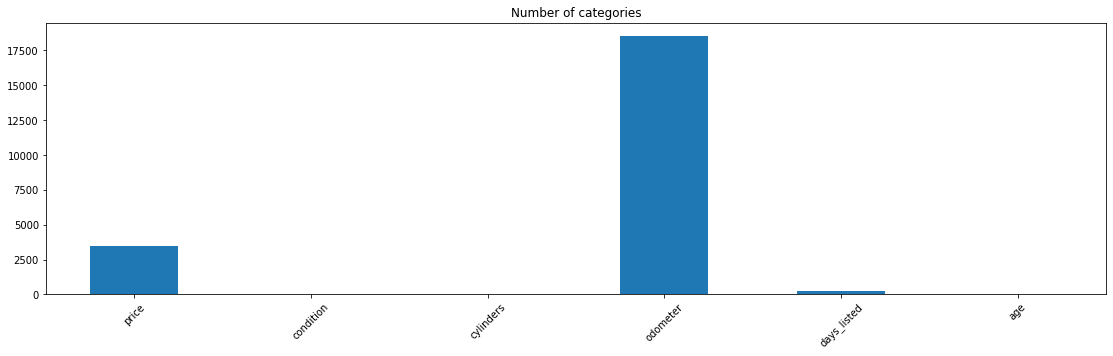

In [145]:
plt.figure(figsize=(19, 5))

df_variant_number = df[core].nunique()
df_variant_number.plot(kind='bar')
plt.title('Number of categories')
plt.xticks(rotation=45)
plt.show()

***Distribution of value ranges for core parameters*** 

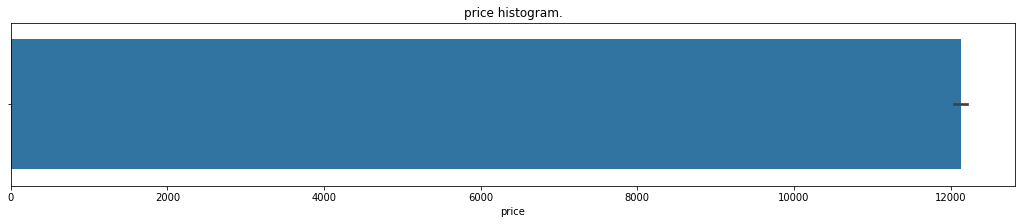

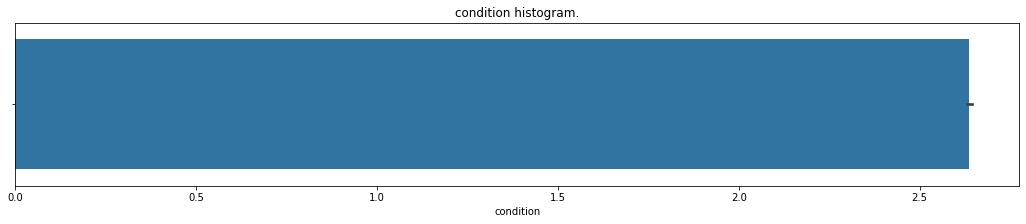

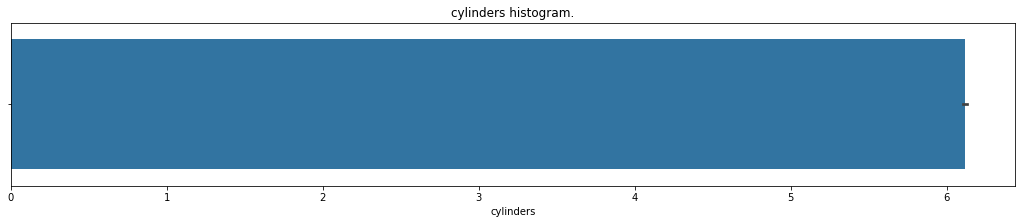

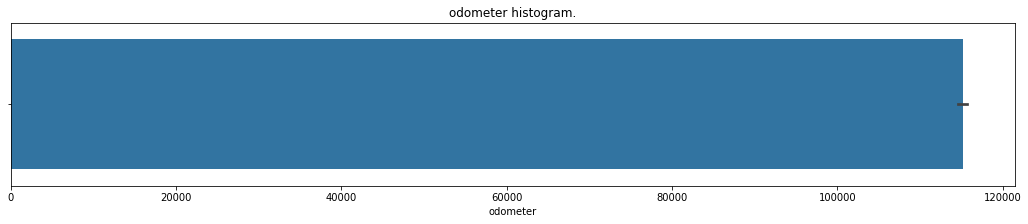

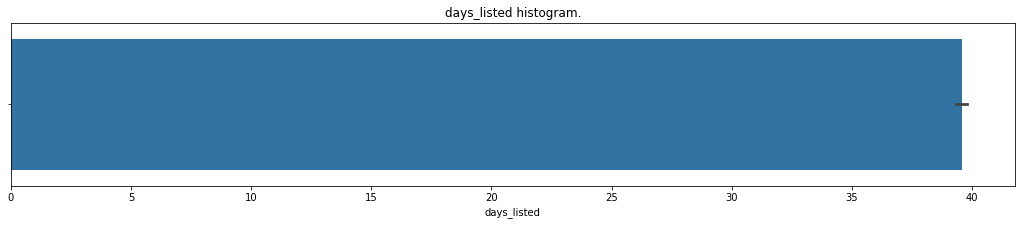

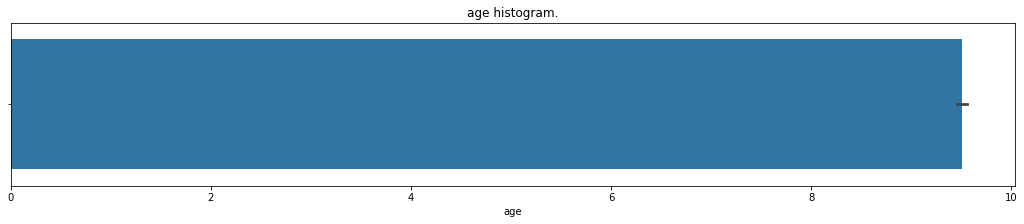

In [146]:
import warnings
warnings.filterwarnings("ignore")

for col in core: 
        plt.figure(figsize=(18, 3))
        sns.barplot(df[col], orient='v')
        plt.title(f'{col} histogram.')
        plt.show()

***Assay of Outliers via boxplot loop***

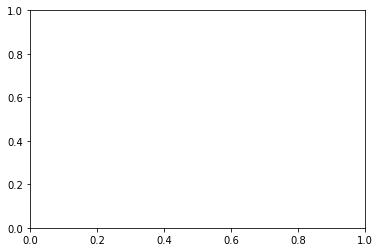

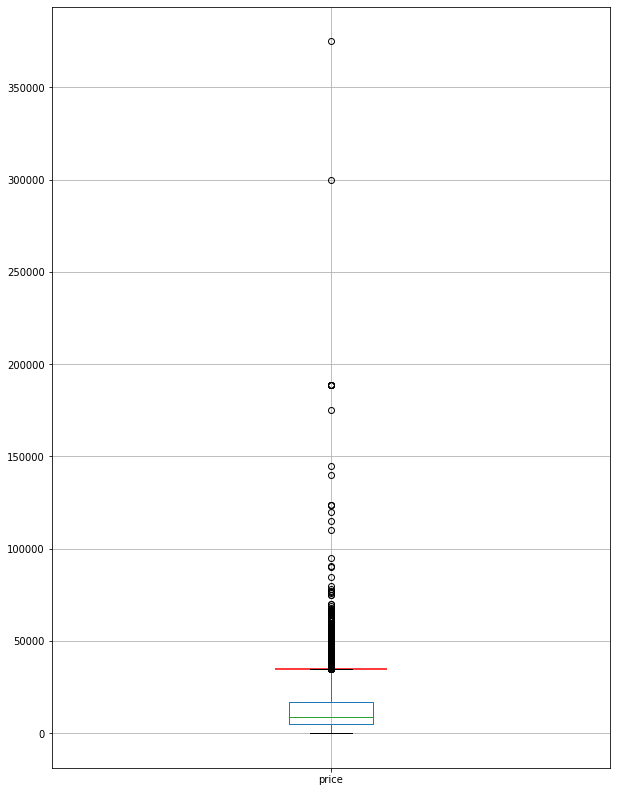

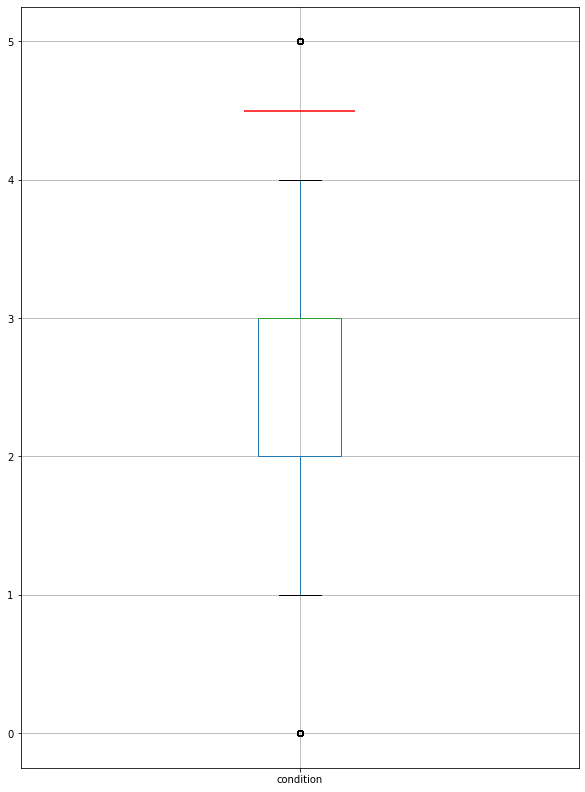

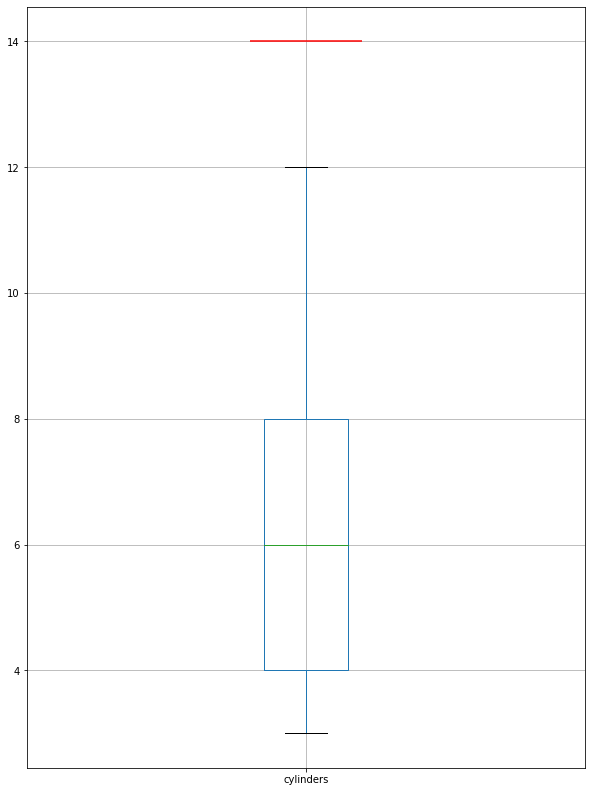

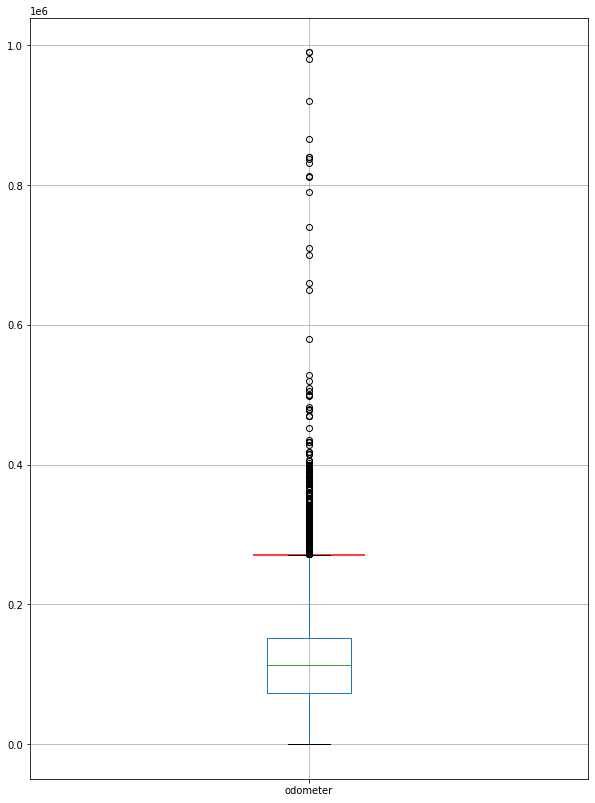

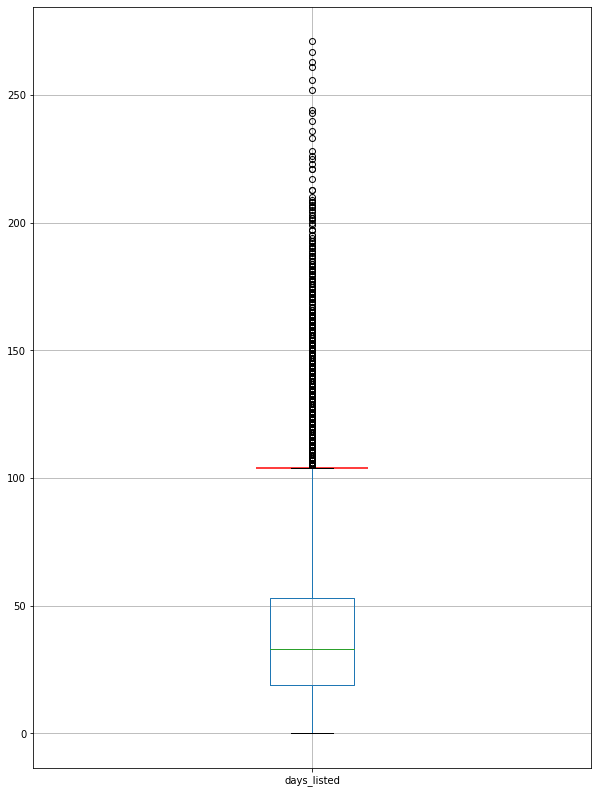

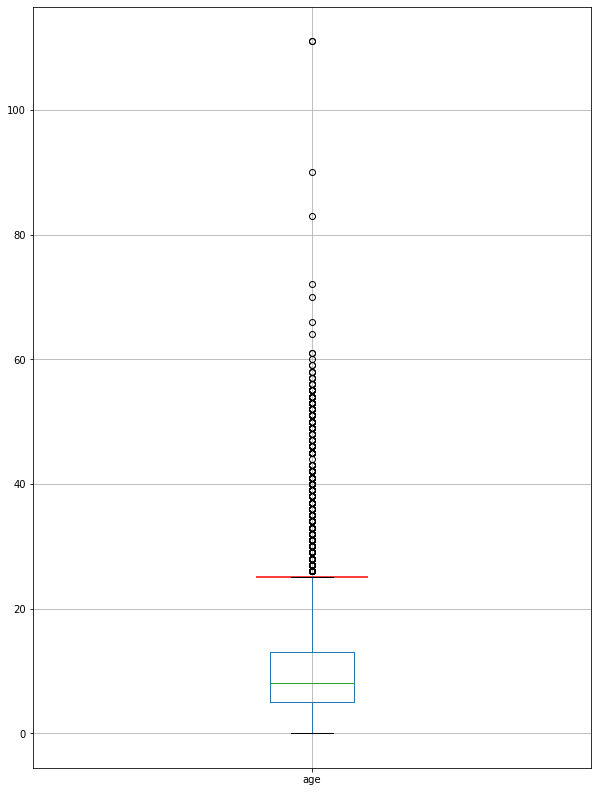

In [147]:
for col in core:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    plt.ylim()
    plt.figure(figsize=(10,14))
    plt.hlines(y=Q3+1.5*IQR, xmin=.9, xmax=1.1, color="red")
    
    #sns.set_theme(style="whitegrid")
    #tips = sns.load_dataset("tips")
    #ax = sns.boxplot(x=df[col])
    df.boxplot(column=[col])

In [148]:
#
df.describe()
df['cylinders'].unique()

array([ 6,  4,  8,  5, 10,  3,  7,  9, 12])

In [149]:
#

df[core].describe()

,price,condition,cylinders,odometer,days_listed,age
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000
mean,12132.464920,2.637535,6.118273,115172.936885,39.55476,9.505250
std,10040.803015,0.712447,1.649018,62828.126295,28.20427,6.158451
min,1.000000,0.000000,3.000000,0.000000,0.00000,0.000000
25%,5000.000000,2.000000,4.000000,72610.000000,19.00000,5.000000
50%,9000.000000,3.000000,6.000000,113000.000000,33.00000,8.000000
75%,16839.000000,3.000000,8.000000,152113.000000,53.00000,13.000000
max,375000.000000,5.000000,12.000000,990000.000000,271.00000,111.000000


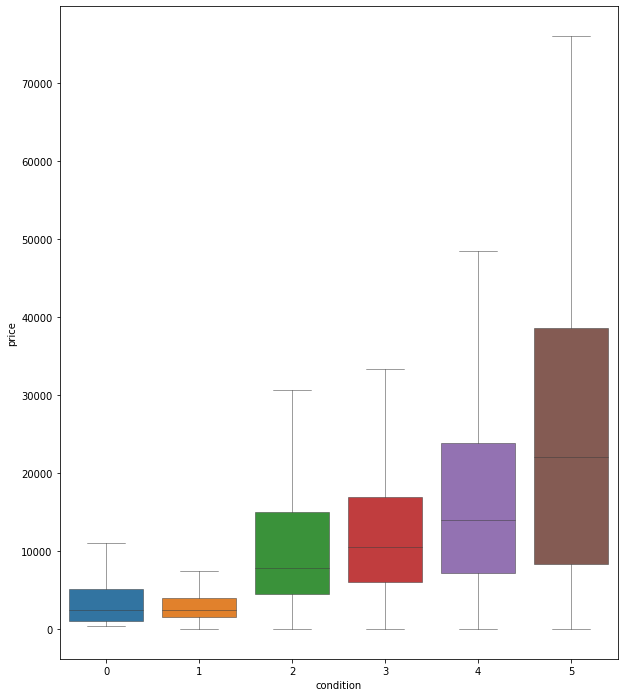

In [150]:
#ax = sns.boxplot(data=g, x="age", y="price", hue="is_4wd", palette='Set3')

#ax = sns.boxplot(x=df['age'], palette='Set3')

plt.figure(figsize = (10,12))
ax = sns.boxplot(x="condition", y="price", data=df, linewidth=.5, showfliers = False)

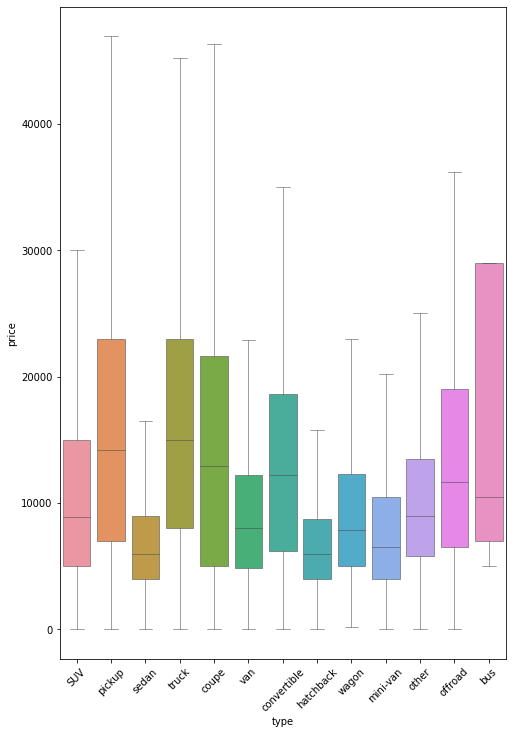

In [151]:
plt.figure(figsize = (8,12))
ax = sns.boxplot(x="type", y="price", data=df, linewidth=.5, showfliers = False)
plt.xticks(rotation=45)
plt.show()

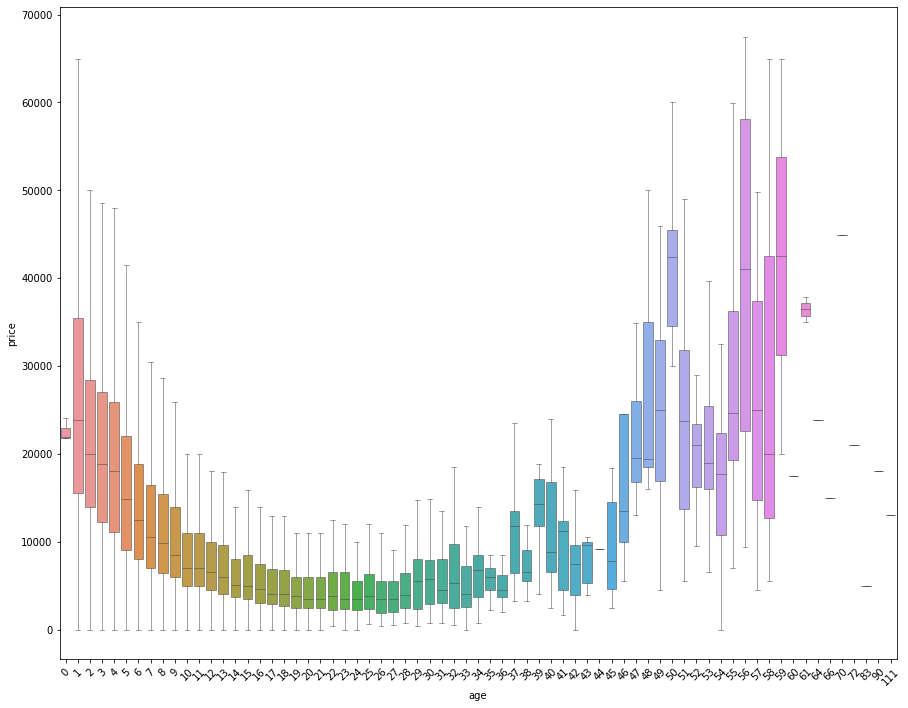

In [152]:
plt.figure(figsize = (15,12))
ax = sns.boxplot(x="age", y="price", data=df, linewidth=.5, showfliers = False)
plt.xticks(rotation=45)
plt.show()

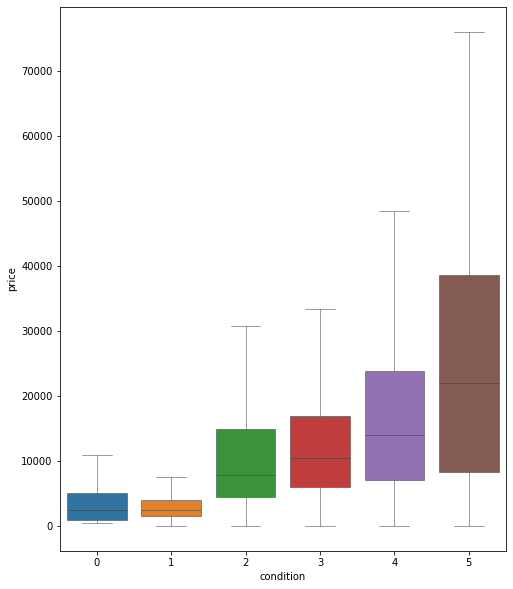

In [153]:
plt.figure(figsize = (8,10))
ax = sns.boxplot(x="condition", y="price", data=df, linewidth=.5, showfliers = False)

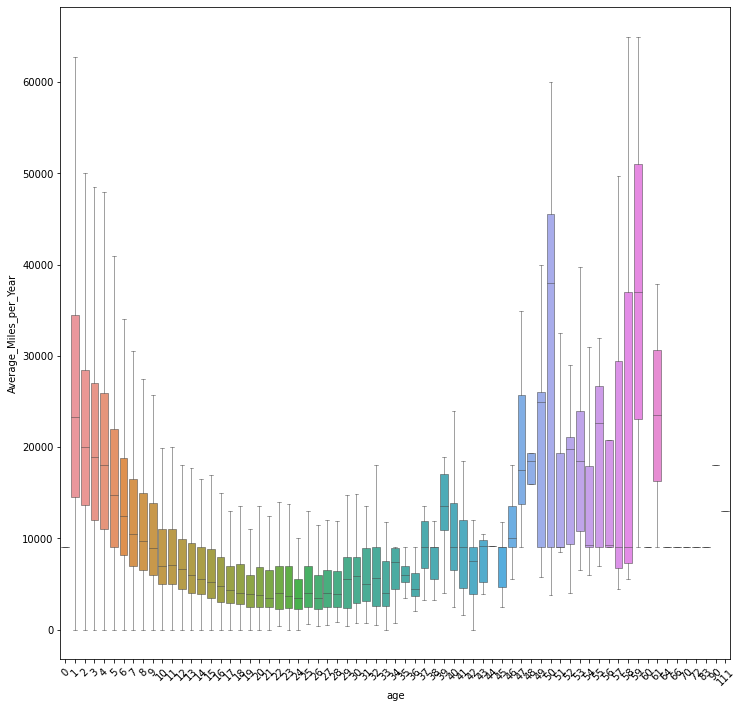

In [154]:
plt.figure(figsize = (12,12))
ax = sns.boxplot(x="age", y="Average_Miles_per_Year", data=df, linewidth=.5, showfliers = False)
plt.xticks(rotation=45)
plt.show()

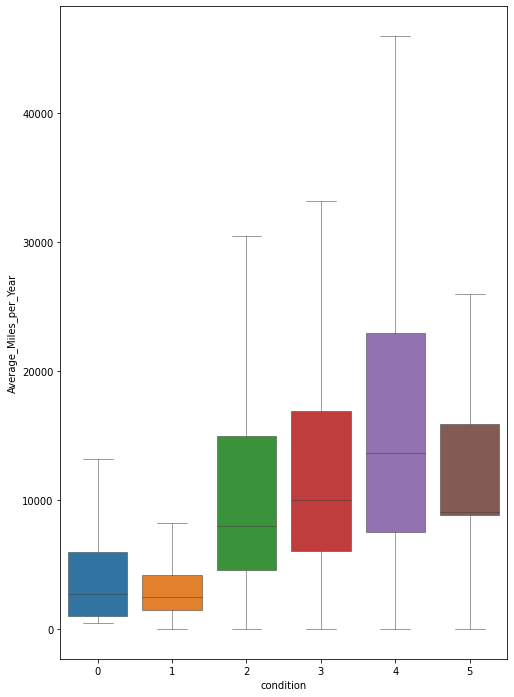

In [155]:
plt.figure(figsize = (8,12))
ax = sns.boxplot(x="condition", y="Average_Miles_per_Year", data=df, linewidth=.5, showfliers = False)


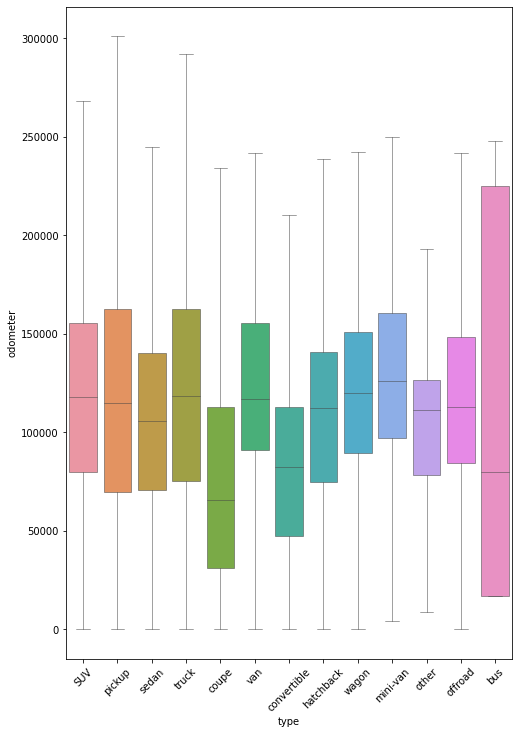

In [156]:
plt.figure(figsize = (8,12))
ax = sns.boxplot(x="type", y="odometer", data=df, linewidth=.5, showfliers = False)
plt.xticks(rotation=45)
plt.show()

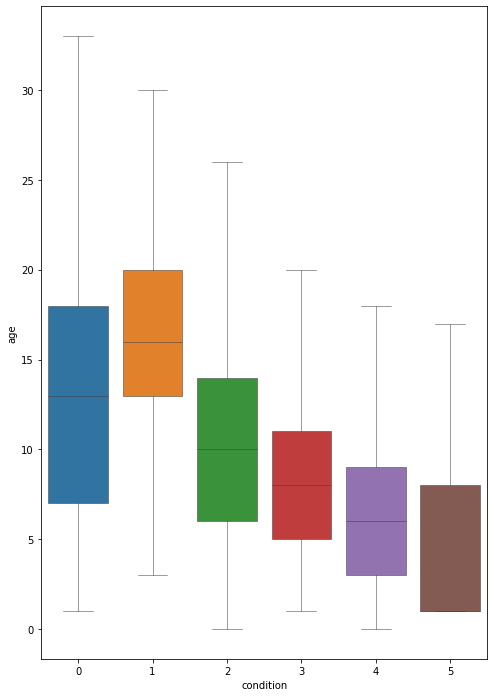

In [157]:
plt.figure(figsize = (8,12))
ax = sns.boxplot(x="condition", y="age", data=df, linewidth=.5, showfliers = False)
plt.xticks()
plt.show()

In [158]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'age', 'Average_Miles_per_Year'],
      dtype='object')

In [159]:
df.price
#plt.figure(figsize = (15,30))
#
#for col in core:
#    ax = sns.boxplot(x=col, y="price", data=df, linewidth=.5)

0         9400
1        25500
2         5500
3         1500
4        14900
         ...  
51520     9249
51521     2700
51522     3950
51523     7455
51524     6300
Name: price, Length: 51525, dtype: int64

In [160]:
#
    #def show_box_chart(dataframe: pd.core.frame.DataFrame, column_name: str):
    #bar_data = dataframe[column_name].value_counts(normalize=True)
#
    #bar_data.plot(kind='box', figsize=(10, 3), rot=0, color='orange', fontsize=12)
    #
    #beautify_column_name = column_name[0].upper() + column_name[1:].replace('_', ' ')
    ##relevant_experience -> Relevant experience
    #
    #plt.title(f'{beautify_column_name}', fontsize=18)
    ##plt.ylabel('price', fontsize=10)
    #plt.xlabel(beautify_column_name, fontsize=10)
#
    #for i, (x, y) in enumerate(bar_data.to_dict().items()):
    #    plt.text(i-.15, y, s=str(round(y, 2)), fontsize=11)
#
    #plt.show()

In [161]:
#Q1 = np.percentile(core, 25, interpolation = 'midpoint') 
#Q2 = np.percentile(core, 50, interpolation = 'midpoint') 
#Q3 = np.percentile(core, 75, interpolation = 'midpoint') 
#  
#print('Q1 25 percentile of the given data is, ', Q1)
#print('Q1 50 percentile of the given data is, ', Q2)
#print('Q1 75 percentile of the given data is, ', Q3)
#
#QR = Q3 - Q1 
#print('Interquartile range is', IQR)

## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

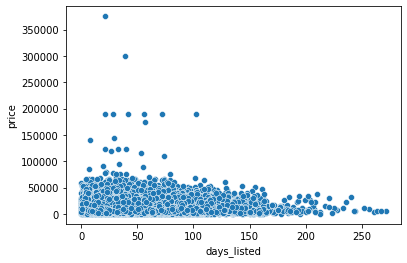

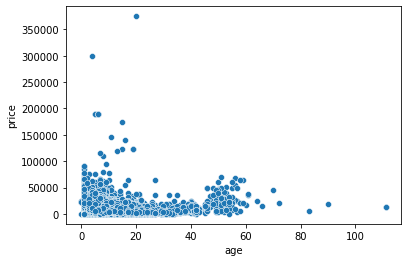

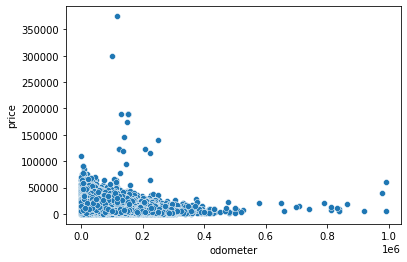

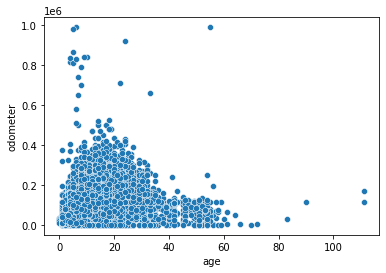

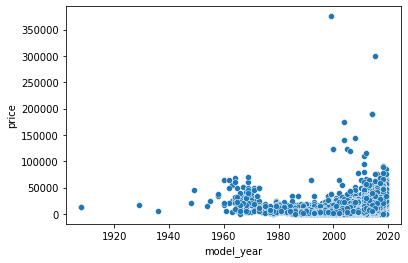

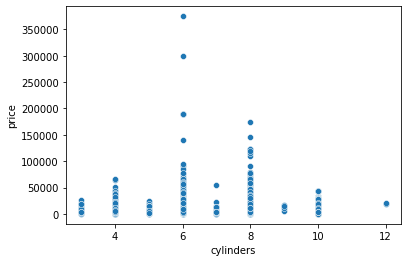

In [162]:
sns.scatterplot(data = df, x = "days_listed", y = "price")
plt.show()

sns.scatterplot(data = df, x = "age", y = "price") 
plt.show()

sns.scatterplot(data = df, x = "odometer", y = "price")
plt.show()

sns.scatterplot(data = df, x = "age", y = "odometer")
plt.show()

sns.scatterplot(data = df, x = "model_year", y = "price")
plt.show()

sns.scatterplot(data = df, x = "cylinders", y = "price")
plt.show()


In [163]:
df[core].describe()

,price,condition,cylinders,odometer,days_listed,age
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000
mean,12132.464920,2.637535,6.118273,115172.936885,39.55476,9.505250
std,10040.803015,0.712447,1.649018,62828.126295,28.20427,6.158451
min,1.000000,0.000000,3.000000,0.000000,0.00000,0.000000
25%,5000.000000,2.000000,4.000000,72610.000000,19.00000,5.000000
50%,9000.000000,3.000000,6.000000,113000.000000,33.00000,8.000000
75%,16839.000000,3.000000,8.000000,152113.000000,53.00000,13.000000
max,375000.000000,5.000000,12.000000,990000.000000,271.00000,111.000000


*For "price," there are several vehicles concentrated above the 3rd quartile, which I will keep by excluding vehicles above $80,000.*

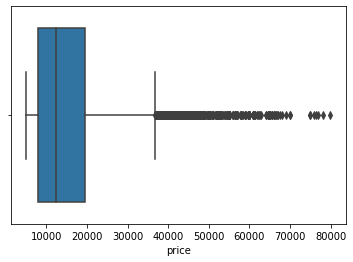

In [164]:
import warnings
warnings.filterwarnings("ignore")

good_price = df.query('5000 <= price <= 80000')
sns.boxplot(good_price['price'])
plt.show()


*In my opinion, trucks are sturdy vehicles; thus, an argument could be made to keep the outlier values, and exclude all values above 200000 miles; whereas, the more anomolous outlier for the pickup at 375000 should liklely be excluded.*  

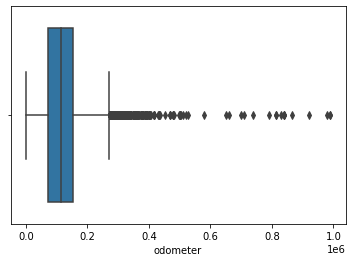

1522

In [165]:
import warnings
warnings.filterwarnings("ignore")

sns.boxplot(df['odometer'])
plt.show()


len(df.query('9290 >= odometer'))

In [166]:
len(df.query('9290 >= price'))

25969

In [167]:
len(df.query('175 <= days_listed'))

86

In [168]:
len(df.query('50 <= age'))

94

In [169]:
len(df.query('1970 >= model_year'))

103

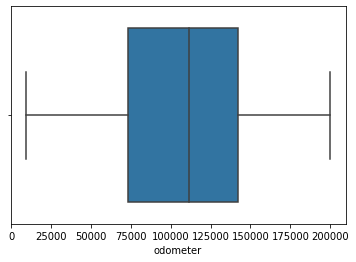

In [170]:
import warnings
warnings.filterwarnings("ignore")

good_mileage = df.query('9290 <= odometer <= 200000')
sns.boxplot(good_mileage['odometer'])
plt.show()

#New_DF = df.loc[(df['goals_per_90_overall'] > .5)]

***Dataframe of core parameters without outliers based on the forefoing aggregate statistical information and scatterplot data visualization*** 

In [171]:
New_DF_Core = df.loc[(df['odometer'] <= 200000) & (df['price'] <= 100000) & (df['days_listed'] <= 175) &(df['age'] <= 50), :] 

New_DF_Core

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
0,9400,2011-01-01,bmw x5,2,6,gas,145000,automatic,SUV,Unknown,Yes,2018-06-23,19,8,9400
1,25500,2014-01-01,ford f-150,2,6,gas,88705,automatic,pickup,white,Yes,2018-10-19,50,5,25500
2,5500,2013-01-01,hyundai sonata,4,4,gas,110000,automatic,sedan,red,No,2019-02-07,79,7,5500
4,14900,2017-01-01,chrysler 200,3,4,gas,80903,automatic,sedan,black,No,2019-04-02,28,3,14900
5,14990,2014-01-01,chrysler 300,3,6,gas,57954,automatic,sedan,black,Yes,2018-06-20,15,5,14990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013-01-01,nissan maxima,4,6,gas,88136,automatic,sedan,black,No,2018-10-03,37,6,9249
51521,2700,2002-01-01,honda civic,0,4,gas,181500,automatic,sedan,white,No,2018-11-14,22,17,2700
51522,3950,2009-01-01,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,No,2018-11-15,32,10,3950
51523,7455,2013-01-01,toyota corolla,2,4,gas,139573,automatic,sedan,black,No,2018-07-02,71,6,7455


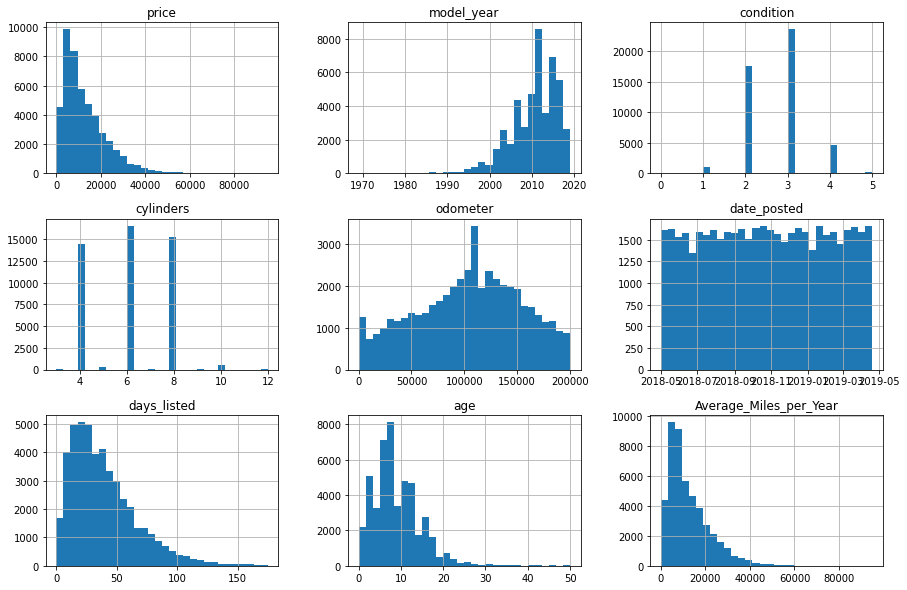

In [172]:
New_DF_Core.hist(bins=30, figsize= (15,10))
plt.show()

In [173]:
New_DF_Core.describe()

,price,condition,cylinders,odometer,days_listed,age,Average_Miles_per_Year
count,47171.000000,47171.000000,47171.000000,47171.000000,47171.000000,47171.000000,47171.000000
mean,12570.596617,2.679846,6.070488,104078.834665,39.289860,8.936423,12529.324585
std,9617.526799,0.698783,1.647816,49876.257948,27.439389,5.663088,9472.456277
min,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
25%,5500.000000,2.000000,4.000000,68091.000000,19.000000,5.000000,5650.000000
50%,9925.000000,3.000000,6.000000,108878.000000,33.000000,8.000000,9791.000000
75%,17000.000000,3.000000,8.000000,141008.000000,53.000000,12.000000,16997.000000
max,94955.000000,5.000000,12.000000,200000.000000,175.000000,50.000000,94955.000000


*Counting values for each cylinder build*

In [174]:
df['cylinders'].value_counts()

6     17858
8     17385
4     15308
10      580
5       326
3        35
7        27
9         4
12        2
Name: cylinders, dtype: int64

***Checking to see whether there are any concomitant anomolies for the 12 and 7 cylinder engines that may crystalize a correlation*** 

In [175]:
df.query('cylinders == 12')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
12615,18000,2001-01-01,ram 2500,3,12,diesel,167500,manual,truck,silver,Yes,2018-08-05,22,18,18000
44117,20000,2004-01-01,ford f350 super duty,3,12,diesel,113000,automatic,truck,grey,Yes,2019-03-29,24,16,20000


In [176]:
df.query('cylinders == 7')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
1704,54508,2019-01-01,ram 2500,3,7,gas,11203,automatic,truck,grey,Yes,2019-01-06,6,1,54508
3648,10980,2011-01-01,ford f150,3,7,gas,64441,automatic,truck,Unknown,No,2019-02-07,75,9,10980
5612,1,2006-01-01,gmc sierra,3,7,gas,192960,automatic,truck,white,No,2018-10-29,39,13,1
7607,3695,2003-01-01,ford explorer,3,7,gas,210000,automatic,SUV,brown,No,2018-08-31,50,16,3695
12749,14990,2011-01-01,ford f150,2,7,gas,139200,automatic,pickup,black,Yes,2019-03-26,72,9,14990
12919,8495,2010-01-01,chevrolet silverado 1500,3,7,gas,135000,automatic,pickup,white,No,2018-06-08,35,9,8495
12991,8350,2010-01-01,ford mustang,3,7,gas,102748,manual,coupe,Unknown,No,2018-05-10,46,9,8350
13308,9900,2003-01-01,ford mustang,4,7,gas,123540,manual,coupe,grey,No,2018-10-19,8,16,9900
14328,1,2018-01-01,ram 3500,3,7,gas,8530,other,truck,Unknown,Yes,2018-06-29,8,1,1
16615,9900,2015-01-01,chevrolet silverado 1500,2,7,gas,175340,automatic,pickup,red,No,2018-05-18,77,4,9900


In [177]:
df[core].describe()

,price,condition,cylinders,odometer,days_listed,age
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000
mean,12132.464920,2.637535,6.118273,115172.936885,39.55476,9.505250
std,10040.803015,0.712447,1.649018,62828.126295,28.20427,6.158451
min,1.000000,0.000000,3.000000,0.000000,0.00000,0.000000
25%,5000.000000,2.000000,4.000000,72610.000000,19.00000,5.000000
50%,9000.000000,3.000000,6.000000,113000.000000,33.00000,8.000000
75%,16839.000000,3.000000,8.000000,152113.000000,53.00000,13.000000
max,375000.000000,5.000000,12.000000,990000.000000,271.00000,111.000000


In [178]:
len(df.query('age >=60'))

11

In [179]:
len(df.query('age <= 60'))

51515

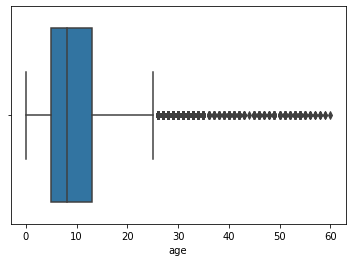

In [180]:
import warnings
warnings.filterwarnings("ignore")

good_age = df.query('0 <= age <= 60')
sns.boxplot(good_age['age'])
plt.show()



***Low Outlier Detection***

In [181]:
core


['price', 'condition', 'cylinders', 'odometer', 'days_listed', 'age']

In [182]:
df.query('price < price.quantile(0.05)')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
3,1500,2003-01-01,ford f-150,1,8,gas,233000,automatic,pickup,Unknown,No,2019-03-22,9,17,1500
73,1900,1994-01-01,jeep grand cherokee laredo,2,6,gas,207,automatic,SUV,grey,Yes,2018-07-27,9,25,9050
218,500,2004-01-01,toyota corolla,4,4,gas,226980,automatic,sedan,blue,No,2018-09-17,24,15,500
242,1500,2001-01-01,jeep grand cherokee,2,6,gas,185000,automatic,SUV,black,Yes,2018-10-15,56,18,1500
317,600,1999-01-01,toyota camry le,0,4,gas,216348,automatic,sedan,white,No,2019-03-04,23,21,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51327,1500,2002-01-01,ford focus,1,4,gas,142481,automatic,sedan,Unknown,No,2018-09-22,9,17,1500
51364,299,2004-01-01,toyota camry,3,4,gas,185234,automatic,sedan,silver,No,2018-12-09,5,15,299
51394,950,2005-01-01,ford f-250,1,8,gas,174000,automatic,van,white,No,2018-06-06,44,14,950
51487,1495,2011-01-01,ford f-150,1,6,gas,15804,manual,truck,white,Yes,2018-09-18,56,8,1495


In [183]:
New_DF_Core['price'].quantile(0.02)

250.0

In [184]:
New_DF_Core['price'].quantile(0.01)

1.0

In [185]:
df.query('odometer < odometer.quantile(0.01)')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
352,7997,2009-01-01,gmc yukon,3,8,gas,0,automatic,SUV,white,Yes,2019-03-16,88,11,9050
501,6300,2003-01-01,toyota rav4,3,4,gas,107,automatic,SUV,red,Yes,2018-09-16,24,16,9050
621,7999,2010-01-01,honda accord,4,4,gas,91,automatic,sedan,silver,No,2018-07-23,18,9,9050
814,2995,1999-01-01,ford f-150,2,6,gas,0,manual,truck,Unknown,No,2019-03-14,16,21,9050
1146,3299,2006-01-01,dodge grand caravan,4,6,gas,110,automatic,mini-van,Unknown,No,2019-04-14,21,14,9050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50915,11900,2014-01-01,toyota tundra,2,8,gas,1,automatic,pickup,silver,Yes,2018-07-13,26,5,9050
51019,6995,2010-01-01,toyota prius,3,4,hybrid,114,automatic,hatchback,grey,No,2018-07-18,22,9,9050
51020,6995,2009-01-01,honda accord,3,4,gas,123,automatic,sedan,green,No,2019-03-02,67,11,9050
51189,5000,2001-01-01,ford mustang,3,8,gas,0,manual,coupe,silver,No,2019-01-20,67,19,9050


In [186]:
New_DF_Core['odometer'].quantile(0.05)

16762.5

In [187]:
New_DF_Core.query('model_year < model_year.quantile(0.05)')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
73,1900,1994-01-01,jeep grand cherokee laredo,2,6,gas,207,automatic,SUV,grey,Yes,2018-07-27,9,25,9050
128,2900,2000-01-01,nissan maxima,2,6,gas,170000,automatic,sedan,green,No,2018-09-23,12,19,2900
130,2900,2000-01-01,nissan maxima,2,6,gas,119227,automatic,sedan,green,No,2019-04-09,27,20,2900
161,3995,1999-01-01,acura tl,2,6,gas,180000,automatic,sedan,black,No,2018-06-19,52,20,3995
165,22000,2000-01-01,ford f350 super duty,2,8,diesel,163000,automatic,truck,Unknown,Yes,2019-02-05,38,20,22000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51363,2900,1997-01-01,toyota 4runner,2,6,gas,200000,automatic,SUV,white,Yes,2019-03-02,74,23,2900
51439,3636,1998-01-01,toyota tacoma,3,4,gas,195000,manual,pickup,Unknown,No,2018-07-12,29,21,3636
51449,4500,1995-01-01,ram 3500,3,10,gas,163000,automatic,pickup,black,Yes,2018-05-14,75,24,4500
51458,2000,1993-01-01,jeep grand cherokee laredo,1,6,gas,141669,automatic,SUV,green,Yes,2019-02-16,25,27,2000


In [188]:
New_DF_Core['model_year'].quantile(0.01)

Timestamp('1993-01-01 00:00:00')

In [189]:
New_DF_Core.model_year.value_counts()

2011-01-01    5061
2013-01-01    3611
2014-01-01    3516
2012-01-01    3498
2015-01-01    3410
2016-01-01    3049
2008-01-01    2756
2010-01-01    2671
2017-01-01    2493
2007-01-01    2424
2018-01-01    2272
2009-01-01    2028
2006-01-01    1949
2005-01-01    1761
2004-01-01    1417
2003-01-01    1145
2002-01-01     832
2001-01-01     617
2000-01-01     482
2019-01-01     387
1999-01-01     378
1998-01-01     275
1997-01-01     221
1995-01-01     146
1996-01-01     131
1994-01-01      93
1993-01-01      84
1989-01-01      53
1990-01-01      47
1992-01-01      42
1991-01-01      40
1986-01-01      38
1988-01-01      34
1987-01-01      28
1985-01-01      19
1984-01-01      19
1979-01-01      18
1973-01-01      16
1978-01-01      15
1980-01-01      13
1977-01-01      13
1970-01-01      10
1981-01-01      10
1982-01-01       9
1983-01-01       7
1971-01-01       7
1975-01-01       7
1969-01-01       7
1972-01-01       5
1974-01-01       4
1976-01-01       3
Name: model_year, dtype: int64

In [190]:
#Determine the lower limits for outliers

for col in core:
    Q1 = df[col].quantile(0.10) 
    Q3 = df[col].quantile(0.90)
    IQR = Q3 - Q1
    print(df.iloc[np.where(df[col] < (Q1 - 1.5 * IQR))])
    


Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed, age, Average_Miles_per_Year]
Index: []
       price model_year                model  condition  cylinders    fuel  \
317      600 1999-01-01      toyota camry le          0          4     gas   
439     1000 2008-01-01            ford f150          0          8     gas   
519     5500 2012-01-01      nissan frontier          0          6     gas   
686      999 1995-01-01       toyota 4runner          0          6     gas   
1503     850 2003-01-01          honda civic          0          4  hybrid   
...      ...        ...                  ...        ...        ...     ...   
50269    500 2008-01-01         nissan versa          0          4     gas   
50698   3500 2011-01-01         honda accord          0          4     gas   
50816   5000 2017-01-01  dodge grand caravan          0          6     gas   
50854   2900 2013-01-01 

In [191]:
df[core].columns

Index(['price', 'condition', 'cylinders', 'odometer', 'days_listed', 'age'], dtype='object')

In [192]:
#from scipy import stats    
##df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
#
#df[(np.abs(stats.zscore(df[0])) < 3)]
#
#df

In [193]:
len(df.query('price <= 2995.0'))

5274

In [194]:
len(df.query('price >= 100000'))

17

***High Outlier Detection Loop***

In [195]:
High=[]
for col in core:
    Q1 = df[col].quantile(0.10) 
    Q3 = df[col].quantile(0.90)
    IQR = Q3 - Q1
    High.append(df.iloc[np.where(df[col] > (Q1 - 1.5 * IQR))])
    
High

[       price model_year           model  condition  cylinders fuel  odometer  \
 0       9400 2011-01-01          bmw x5          2          6  gas    145000   
 1      25500 2014-01-01      ford f-150          2          6  gas     88705   
 2       5500 2013-01-01  hyundai sonata          4          4  gas    110000   
 3       1500 2003-01-01      ford f-150          1          8  gas    233000   
 4      14900 2017-01-01    chrysler 200          3          4  gas     80903   
 ...      ...        ...             ...        ...        ...  ...       ...   
 51520   9249 2013-01-01   nissan maxima          4          6  gas     88136   
 51521   2700 2002-01-01     honda civic          0          4  gas    181500   
 51522   3950 2009-01-01  hyundai sonata          3          4  gas    128000   
 51523   7455 2013-01-01  toyota corolla          2          4  gas    139573   
 51524   6300 2014-01-01   nissan altima          2          4  gas    100355   
 
       transmission    typ

In [196]:
New_DF_Core.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'age', 'Average_Miles_per_Year'],
      dtype='object')

In [197]:
core

['price', 'condition', 'cylinders', 'odometer', 'days_listed', 'age']

## Study core parameters without outliers

**Scatterplot for Core parameters without high outliers**

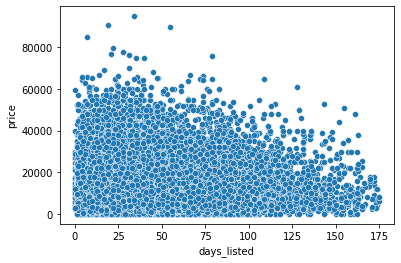

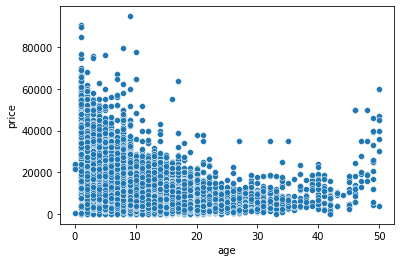

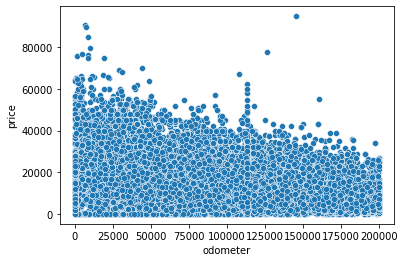

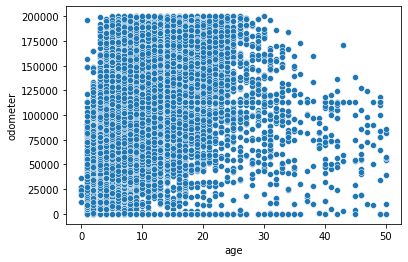

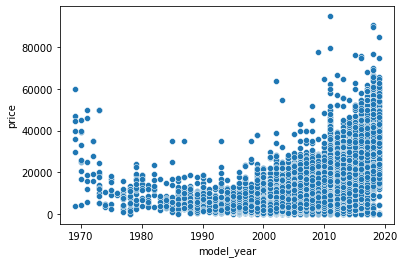

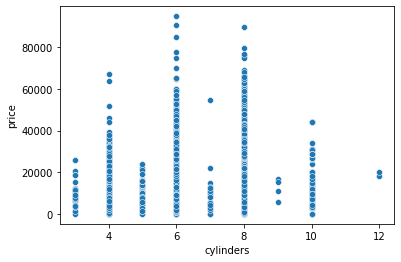

In [198]:
sns.scatterplot(data = New_DF_Core, x = "days_listed", y = "price")
plt.show()

sns.scatterplot(data = New_DF_Core, x = "age", y = "price") 
plt.show()

sns.scatterplot(data = New_DF_Core, x = "odometer", y = "price")
plt.show()

sns.scatterplot(data = New_DF_Core, x = "age", y = "odometer")
plt.show()

sns.scatterplot(data = New_DF_Core, x = "model_year", y = "price")
plt.show()

sns.scatterplot(data = New_DF_Core, x = "cylinders", y = "price")
plt.show()


In [199]:
New_DF_Core.condition.value_counts()

3    23605
2    17635
4     4647
1     1058
5      136
0       90
Name: condition, dtype: int64

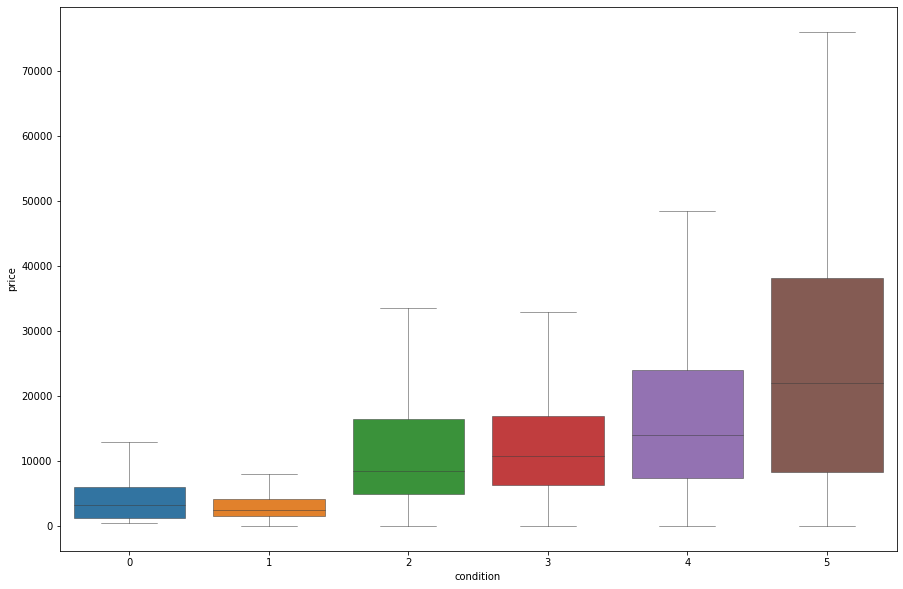

In [200]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x="condition", y="price", data=New_DF_Core, linewidth=.5, showfliers = False)
plt.show()

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

*The interquartile ranges indicate that most vehicles are listed between 19 and 53 days*

In [201]:
New_DF_Core['days_listed'].describe()

count    47171.000000
mean        39.289860
std         27.439389
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        175.000000
Name: days_listed, dtype: float64

***Analysis: Age of vehicle v. Days Listed***

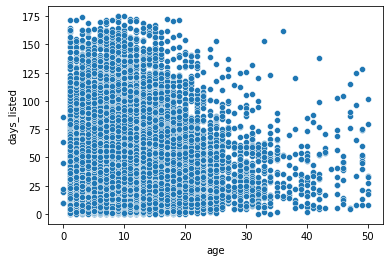

In [202]:
sns.scatterplot(data = New_DF_Core, x = "age", y = "days_listed")
plt.show()

In [203]:
New_DF_Core.age.describe()

count    47171.000000
mean         8.936423
std          5.663088
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         50.000000
Name: age, dtype: float64

In [204]:
New_DF_Core.age.value_counts()

8     4645
6     3570
5     3544
7     3483
9     3353
4     3245
3     2930
12    2557
11    2492
10    2281
1     2185
2     2159
13    2103
14    1765
15    1560
16    1216
17     921
18     708
19     493
20     429
21     311
22     229
23     162
24     130
25     121
26      80
27      61
29      49
31      48
30      44
28      35
33      33
32      27
34      26
35      21
40      18
42      16
46      13
49      13
41      13
39      12
37      10
45      10
38       9
36       8
50       8
0        7
47       6
43       6
48       5
44       1
Name: age, dtype: int64

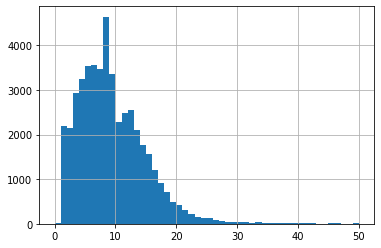

In [205]:
New_DF_Core.age.hist(bins=50)
plt.show()

***Analysis: Condition v. Days Listed***

In [206]:
New_DF_Core.condition.value_counts()

3    23605
2    17635
4     4647
1     1058
5      136
0       90
Name: condition, dtype: int64

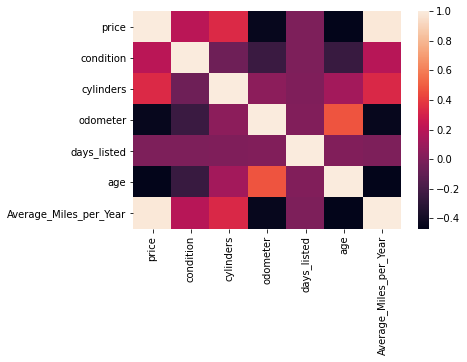

In [214]:
sns.heatmap(New_DF_Core.corr())

plt.show()

*The typical lifetime of an ad is between 33  and 53 days.*

In [215]:
New_DF_Core['days_listed'].median()

33.0

In [216]:
New_DF_Core['days_listed'].max()#Cutoff deliniation to remove high outliers

175

*Abnormally few days listed*

In [217]:
New_DF_Core.query('days_listed < 1')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
1247,14995,2008-01-01,chevrolet silverado 1500,3,8,gas,93300,automatic,truck,grey,Yes,2018-05-15,0,11,14995
1711,59589,2019-01-01,chevrolet silverado 2500hd,3,8,diesel,4146,automatic,truck,white,Yes,2019-01-13,0,1,59589
1983,14000,1999-01-01,ford f250,3,8,diesel,137500,automatic,truck,red,Yes,2018-09-27,0,20,14000
3965,16750,1985-01-01,chevrolet corvette,4,8,gas,24540,automatic,hatchback,white,No,2018-10-14,0,34,9050
4901,12500,2001-01-01,ram 1500,2,8,gas,99892,automatic,truck,black,Yes,2018-05-11,0,18,12500
6548,4800,2007-01-01,honda odyssey,2,6,gas,152400,automatic,mini-van,brown,No,2018-09-25,0,12,4800
7036,5900,2007-01-01,jeep grand cherokee laredo,3,6,gas,126000,automatic,SUV,grey,Yes,2018-07-21,0,12,5900
9607,4999,2012-01-01,nissan sentra,3,4,gas,125000,automatic,sedan,silver,No,2019-03-26,0,8,4999
9732,15000,2003-01-01,ford f-150,2,8,gas,90048,automatic,truck,black,No,2018-09-21,0,16,15000
12869,21997,2014-01-01,honda pilot,3,6,gas,37093,automatic,SUV,silver,Yes,2019-03-04,0,6,21997


*High number of days listed without outliers*

In [218]:
New_DF_Core.query('days_listed > 160')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
228,8795,2014-01-01,honda civic,3,4,gas,85452,automatic,sedan,grey,No,2018-09-11,164,5,8795
2429,12995,2015-01-01,kia sorento,3,4,gas,89400,automatic,wagon,red,Yes,2018-09-13,169,4,12995
2921,4500,2016-01-01,ford explorer,3,6,gas,40892,automatic,SUV,green,No,2018-05-14,174,3,4500
2989,2500,2002-01-01,nissan sentra,2,4,gas,102000,automatic,sedan,grey,No,2019-01-20,171,18,2500
3121,3990,2004-01-01,bmw x5,4,6,gas,132401,automatic,SUV,silver,Yes,2018-11-20,166,15,3990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49041,3800,2005-01-01,ford f-150,2,8,gas,10000,automatic,truck,white,Yes,2019-03-27,165,15,9050
49820,17000,2010-01-01,ram 2500,2,8,gas,142000,automatic,truck,white,Yes,2018-05-10,170,9,17000
50540,23950,2019-01-01,ford f-150,4,6,gas,5000,automatic,truck,white,No,2019-04-14,163,1,23950
50921,9995,2012-01-01,toyota tacoma,3,6,gas,172695,automatic,truck,grey,No,2018-09-19,162,7,9995


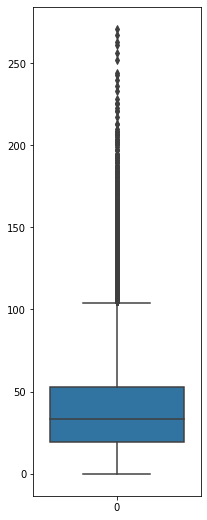

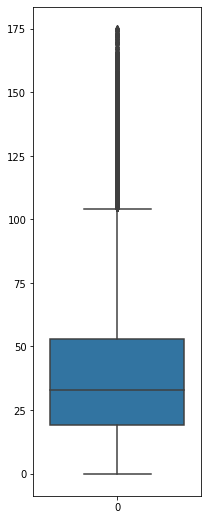

In [219]:

#ax.plot(x, y)
plt.figure(figsize=(3, 9))

#fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(data=df['days_listed'])
plt.show()

plt.figure(figsize = (3,9))
sns.boxplot(data=New_DF_Core['days_listed'])

#fig, axes = plt.subplots(1, 2)
plt.show()



In [220]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'age', 'Average_Miles_per_Year'],
      dtype='object')

## Average Price per Vehicle Type

In [221]:
df['type'].value_counts().describe()

count       13.000000
mean      3963.461538
std       5079.774201
min         24.000000
25%        446.000000
50%       1161.000000
75%       6988.000000
max      12405.000000
Name: type, dtype: float64

In [222]:
df['type'].describe()

count     51525
unique       13
top         SUV
freq      12405
Name: type, dtype: object

***Counting Number of Ads per Vehicle Type***


In [223]:
df['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

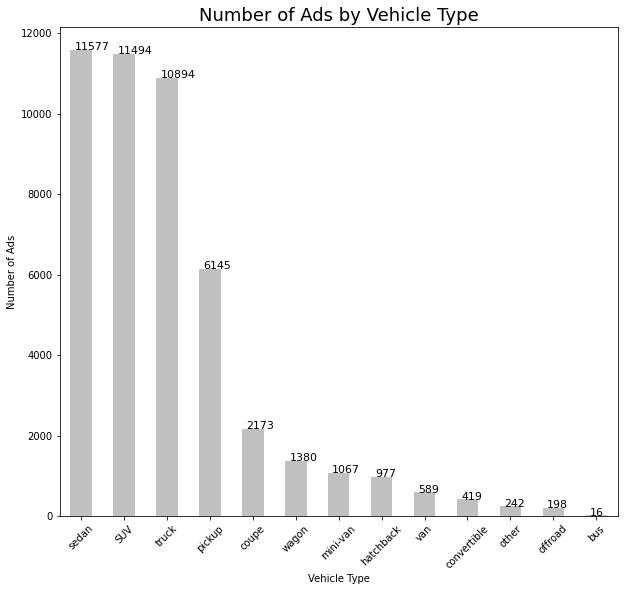

In [224]:
bar_data = New_DF_Core.type.value_counts(normalize=False)

bar_data.plot(kind='bar', color='silver', rot=0, figsize=(10,9))
plt.title('Number of Ads by Vehicle Type', fontsize=18)
plt.ylabel('Number of Ads', fontsize=10)
plt.xlabel('Vehicle Type', fontsize=10)
plt.xticks(rotation = 45)

for i, (x, y) in enumerate(bar_data.to_dict().items()):
    plt.text(i-.15, y, s=str(round(y, 2)), fontsize=11)
    
    
plt.show()

***Average Number of Days Listed by Vehicle Type***

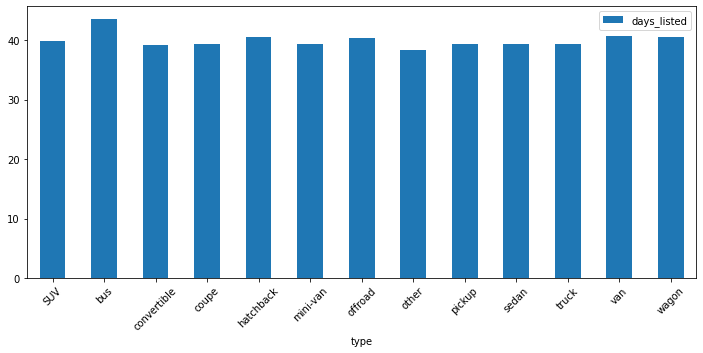

In [227]:
df.pivot_table(index='type', values='days_listed', aggfunc='mean').plot(kind='bar',figsize=(12, 5))
plt.xticks(rotation=45)
plt.show()



***Average Price by Vehicle Type***

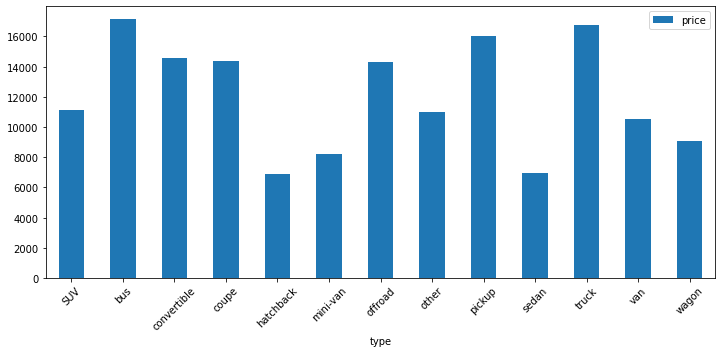

In [228]:
df.pivot_table(index='type', values='price', aggfunc='mean').plot(kind='bar',figsize=(12, 5))
plt.xticks(rotation=45)
plt.show()

***Checked average number of days listed by vehicle type***

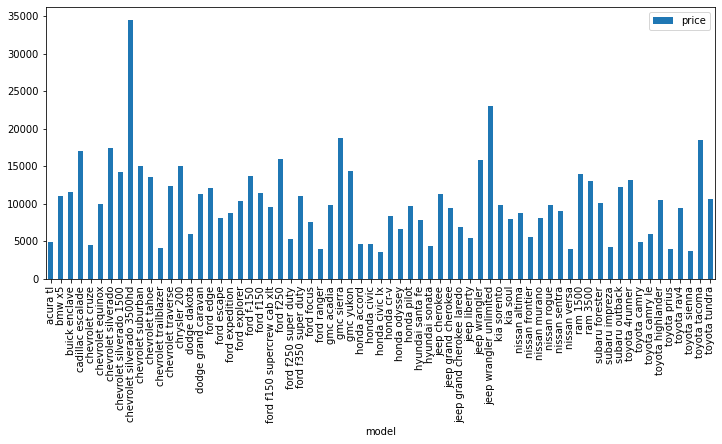

In [240]:
#Price by SUV Model
df.query('type == "SUV"').pivot_table(index='model', values='price', aggfunc='mean').plot(kind='bar',figsize=(12, 5))
plt.show()

In [241]:
New_DF_Core.query('model == "chevrolet tahoe"').describe()

,price,condition,cylinders,odometer,days_listed,age,Average_Miles_per_Year
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,14836.174917,2.742574,7.962046,114957.724422,39.646865,9.589109,15018.503300
std,12113.774824,0.747272,0.304585,55769.179805,29.401311,5.421519,11810.812997
min,1.000000,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000
25%,5999.000000,2.000000,8.000000,91830.250000,18.250000,5.000000,6862.500000
50%,11987.500000,3.000000,8.000000,119761.500000,32.000000,9.000000,11965.000000
75%,19995.000000,3.000000,8.000000,160000.000000,55.000000,13.000000,19995.000000
max,60774.000000,5.000000,8.000000,200000.000000,164.000000,25.000000,60774.000000


In [242]:
New_DF_Core.query('model == "jeep grand cherokee"').describe()

,price,condition,cylinders,odometer,days_listed,age,Average_Miles_per_Year
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,10166.139344,2.672131,6.610656,111015.377049,39.344262,9.810109,10305.490437
std,8068.973220,0.706924,0.984168,48602.469759,28.741435,5.292356,7987.067587
min,1.000000,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000
25%,4000.000000,2.000000,6.000000,77000.000000,18.000000,5.000000,4355.000000
50%,7650.000000,3.000000,6.000000,116937.500000,32.000000,9.000000,7997.000000
75%,14812.500000,3.000000,8.000000,150148.250000,56.000000,14.000000,14812.500000
max,43997.000000,5.000000,10.000000,200000.000000,158.000000,25.000000,43997.000000


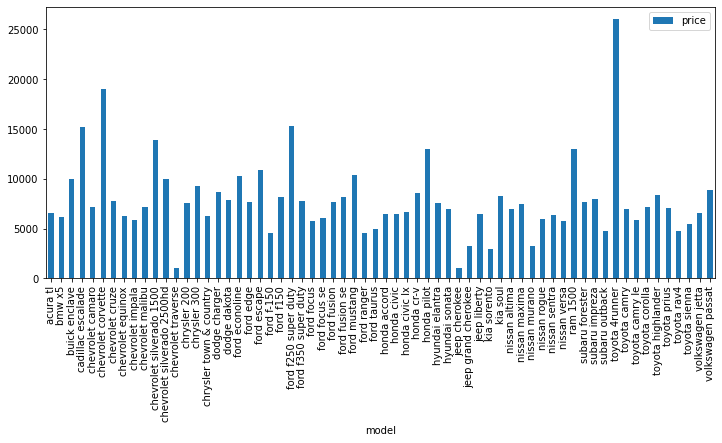

In [243]:
#Price by Sedan Model
df.query('type == "sedan"').pivot_table(index='model', values='price', aggfunc='mean').plot(kind='bar',figsize=(12, 5))
plt.show()

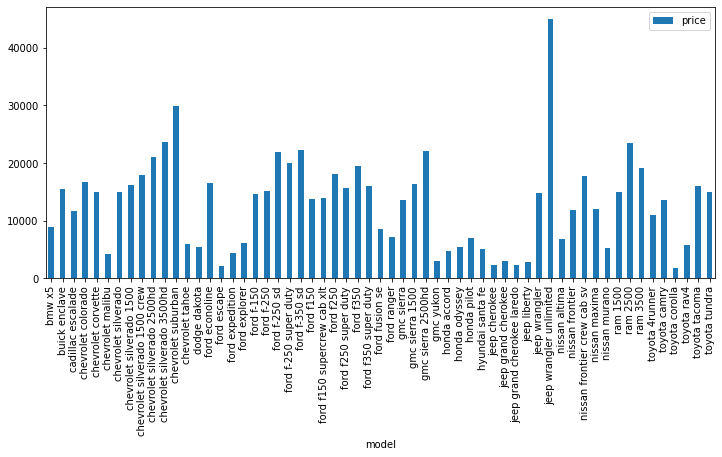

In [244]:
#Price by Truck Model
x = df.query('type == "truck"').pivot_table(index='model', values='price', aggfunc='mean').plot(kind='bar',figsize=(12, 5))

#plt.xticks(rotation = 90)
#plt.show()

**Checking impact of fuel type on price of vehicle**

In [245]:
New_DF_Core.fuel.value_counts()

gas         43827
diesel       2865
hybrid        368
other         105
electric        6
Name: fuel, dtype: int64

In [246]:
New_DF_Core.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,Average_Miles_per_Year
0,9400,2011-01-01,bmw x5,2,6,gas,145000,automatic,SUV,Unknown,Yes,2018-06-23,19,8,9400
1,25500,2014-01-01,ford f-150,2,6,gas,88705,automatic,pickup,white,Yes,2018-10-19,50,5,25500
2,5500,2013-01-01,hyundai sonata,4,4,gas,110000,automatic,sedan,red,No,2019-02-07,79,7,5500
4,14900,2017-01-01,chrysler 200,3,4,gas,80903,automatic,sedan,black,No,2019-04-02,28,3,14900
5,14990,2014-01-01,chrysler 300,3,6,gas,57954,automatic,sedan,black,Yes,2018-06-20,15,5,14990


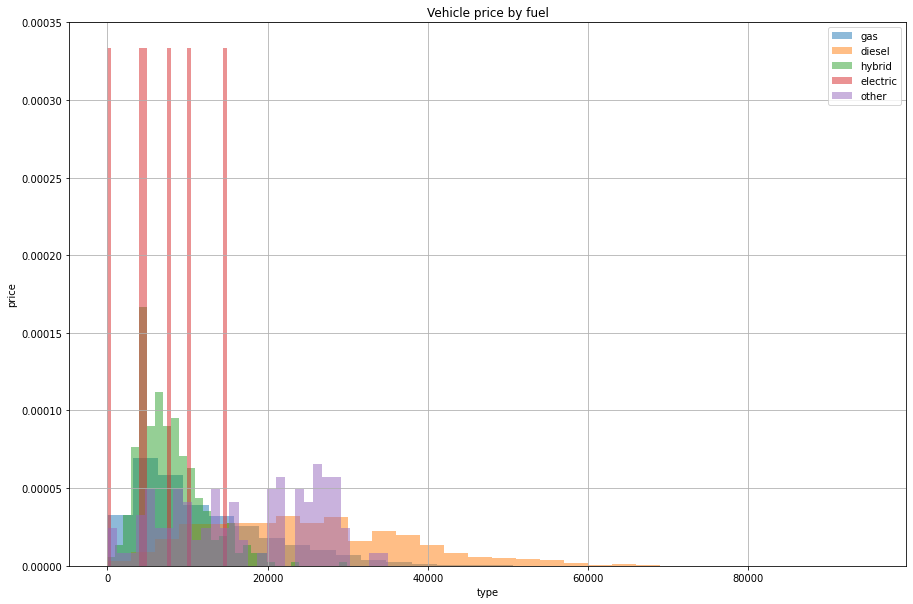

In [247]:


New_DF_Core[New_DF_Core.fuel == 'gas'].price.hist(
    bins=30, figsize=(15, 10), alpha=.5, density=True
)

New_DF_Core[New_DF_Core.fuel == 'diesel'].price.hist(
    bins=30, figsize=(15, 10), alpha=.5, density=True
)


New_DF_Core[New_DF_Core.fuel == 'hybrid'].price.hist(
    bins=30, figsize=(15, 10), alpha=.5, density=True
)

New_DF_Core[New_DF_Core.fuel == 'electric'].price.hist(
    bins=30, figsize=(15, 10), alpha=.5, density=True
)

New_DF_Core[New_DF_Core.fuel == 'other'].price.hist(
    bins=30, figsize=(15, 10), alpha=.5, density=True
)


#df.sort_values(by='fuel').price.hist(bins=200, figsize=(15, 30), alpha=.5, density=True)

plt.title('Vehicle price by fuel')
plt.ylabel('price')
plt.xlabel('type')
plt.legend(['gas', 'diesel', 'hybrid','electric', 'other'])

plt.show()

In [248]:
df.fuel.unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

## Price factors

In [249]:
New_DF_Core.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'age', 'Average_Miles_per_Year'],
      dtype='object')

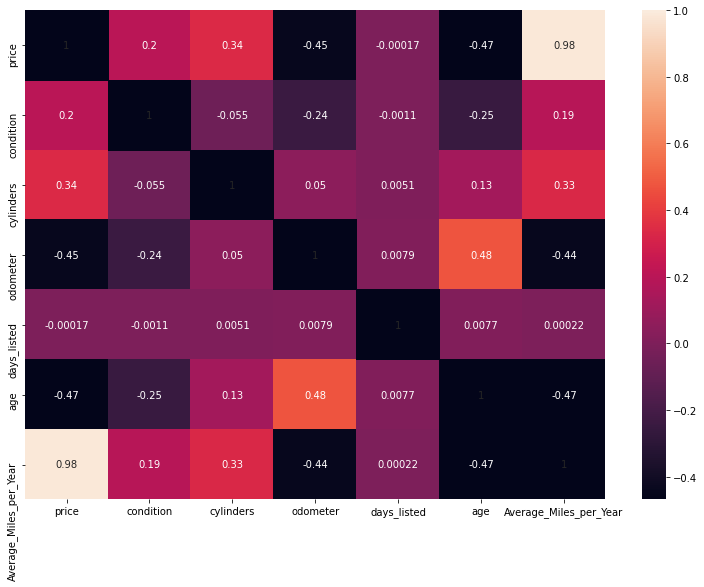

In [250]:
correlation_matrix = New_DF_Core.corr()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlation_matrix,annot=True)

sns.heatmap(correlation_matrix, mask=correlation_matrix < 1, cbar=False)
plt.show()

In [251]:
New_DF_Core.corr()

,price,condition,cylinders,odometer,days_listed,age,Average_Miles_per_Year
price,1.000000,0.203826,0.335797,-0.445289,-0.000169,-0.467194,0.983340
condition,0.203826,1.000000,-0.054709,-0.241398,-0.001068,-0.245055,0.191049
cylinders,0.335797,-0.054709,1.000000,0.049525,0.005059,0.127881,0.332406
odometer,-0.445289,-0.241398,0.049525,1.000000,0.007942,0.477224,-0.443472
days_listed,-0.000169,-0.001068,0.005059,0.007942,1.000000,0.007679,0.000217
age,-0.467194,-0.245055,0.127881,0.477224,0.007679,1.000000,-0.468764
Average_Miles_per_Year,0.983340,0.191049,0.332406,-0.443472,0.000217,-0.468764,1.000000


In [252]:
New_DF_Core.transmission.value_counts()

automatic    42966
manual        2437
other         1768
Name: transmission, dtype: int64

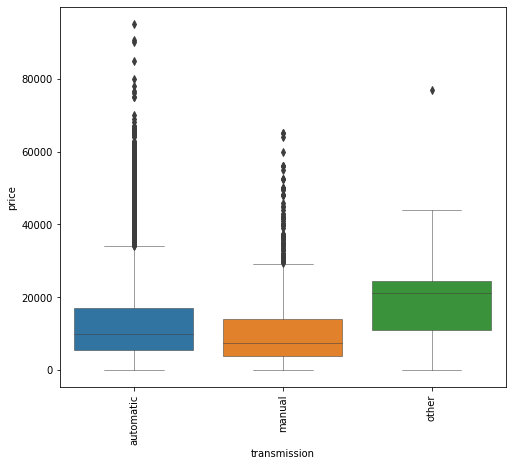

In [253]:
plt.figure(figsize = (8,7))
ax = sns.boxplot(x="transmission", y="price", data= New_DF_Core, linewidth=.5)
plt.xticks(rotation=90)
plt.show()

In [254]:
New_DF_Core.paint_color.value_counts()

white      9088
Unknown    8495
black      7202
silver     5788
grey       4693
blue       4084
red        3994
green      1185
brown      1071
custom     1046
yellow      228
orange      214
purple       83
Name: paint_color, dtype: int64

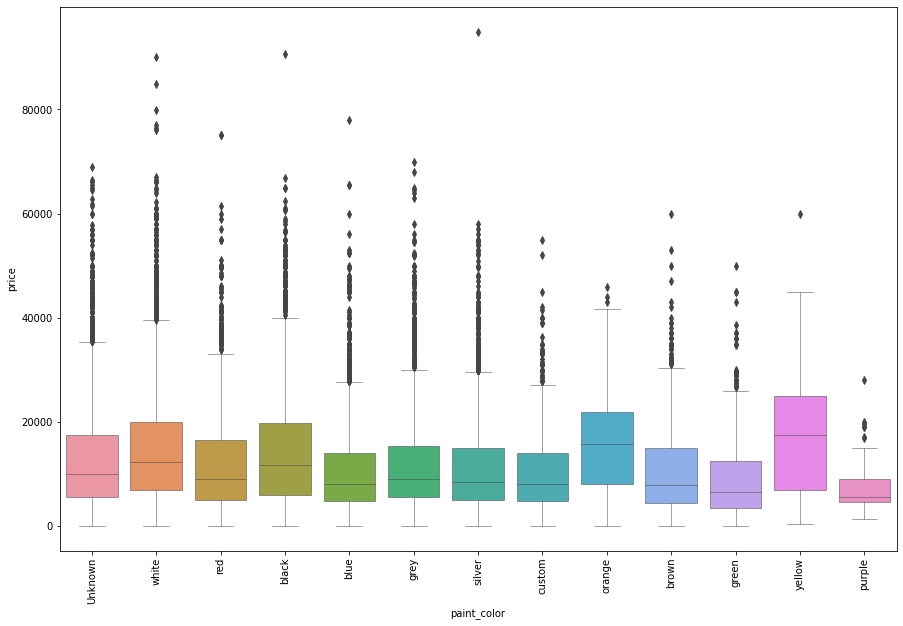

In [255]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x="paint_color", y="price", data= New_DF_Core, linewidth=.5)
plt.xticks(rotation=90)
plt.show()

In [256]:
New_DF_Core.cylinders.value_counts()

6     16561
8     15213
4     14476
10      552
5       308
3        32
7        23
9         4
12        2
Name: cylinders, dtype: int64

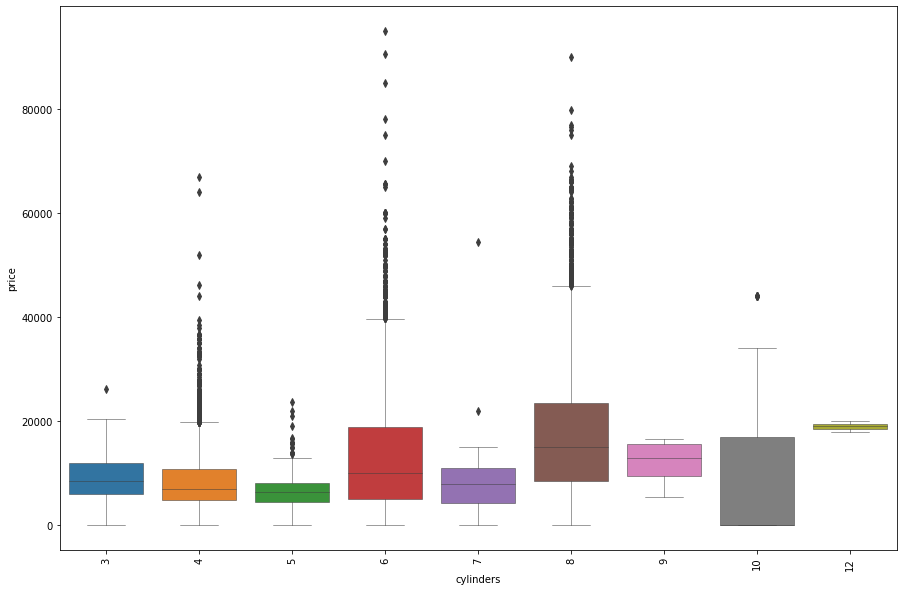

In [257]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x="cylinders", y="price", data= New_DF_Core, linewidth=.5)
plt.xticks(rotation=90)
plt.show()

In [258]:
New_DF_Core.fuel.value_counts()

gas         43827
diesel       2865
hybrid        368
other         105
electric        6
Name: fuel, dtype: int64

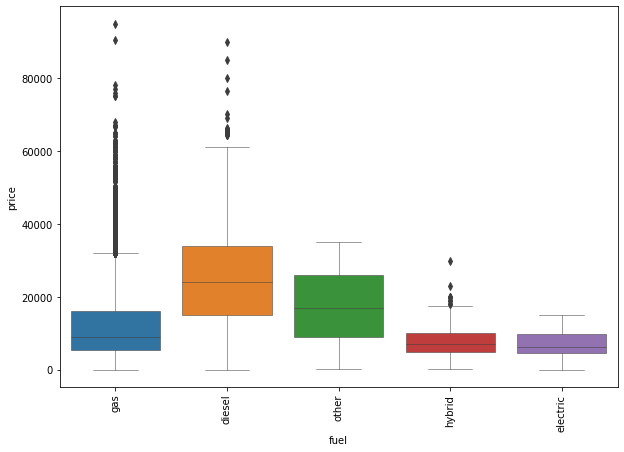

In [259]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(x="fuel", y="price", data= New_DF_Core, linewidth=.5)
plt.xticks(rotation=90)
plt.show()

**Age v. Price**

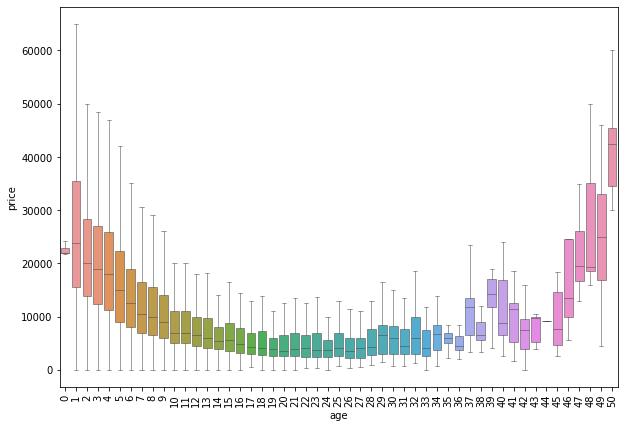

In [260]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(x="age", y="price", data=New_DF_Core, linewidth=.5, showfliers = False)
plt.xticks(rotation=90)
plt.show()

In [261]:
New_DF_Core.is_4wd.value_counts()

No     23952
Yes    23219
Name: is_4wd, dtype: int64

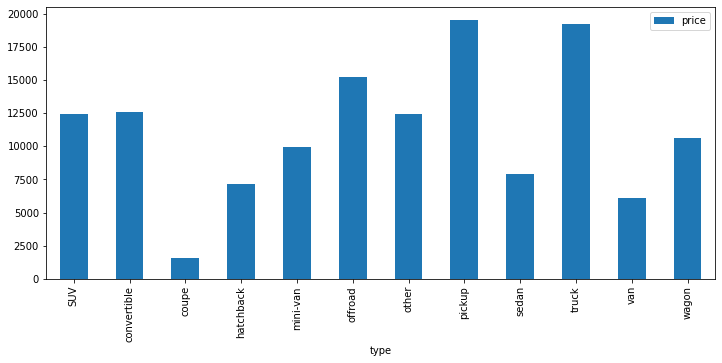

In [262]:
New_DF_Core.query('is_4wd == "Yes"').pivot_table(index='type', values='price', aggfunc='mean').plot(kind='bar',figsize=(12, 5))

#for i, val in enumerate(New_DF_Core['price'].values):
#    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
#    plt.xticks(rotation=45)
##for index, row in mau_total.iterrows():
#    #ax.text(row.name,row.Uid, round(row.Uid,2), color='black', ha="center")
plt.show()

#plt.show()

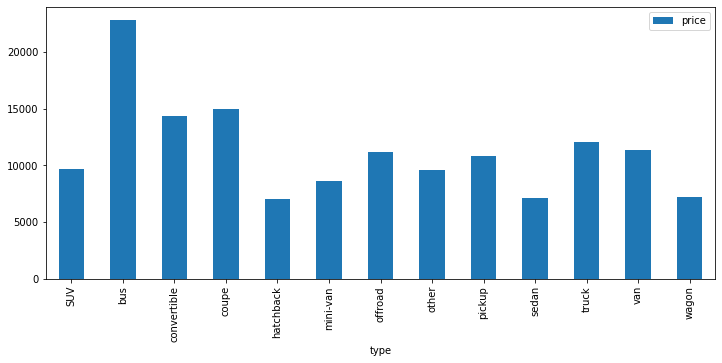

In [263]:
New_DF_Core.query('is_4wd == "No"').pivot_table(index='type', values='price', aggfunc='mean').plot(kind='bar',figsize=(12, 5))
plt.show()

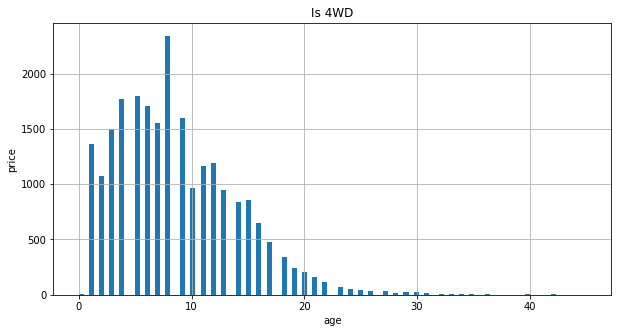

In [264]:
New_DF_Core[New_DF_Core.is_4wd == 'Yes'].age.hist(bins=100, figsize=(10, 5))
plt.title('Is 4WD')
plt.ylabel('price')
plt.xlabel('age')
plt.show()

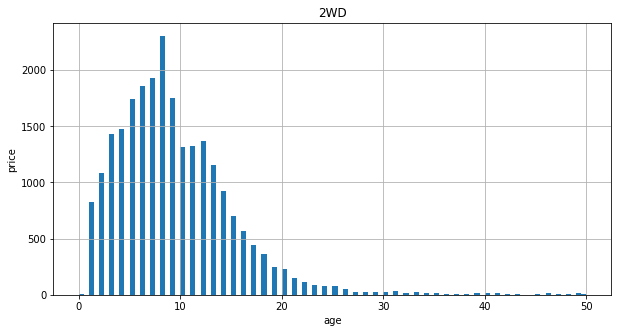

In [265]:
New_DF_Core[New_DF_Core.is_4wd == 'No'].age.hist(bins=100, figsize=(10, 5))
plt.title('2WD')
plt.ylabel('price')
plt.xlabel('age')
plt.show()

## General conclusion ##



***Parameter Correlation with Price***

>***Technical Application***: Implemented a correlation matrix to determine the degree of positive or negative correlation with selected qualitative and quantitive parameters. For average miles driven per year, first, the missing odomometer parameter values were filled with the grouped values of the other qualitative amd quantative values, ***supra***.

>***Conclusion***: The average miles driven per year, a derivative of the odometer parameter, has the highest positive correlation with price whereby the correlation coefficient is 98%. Conversely, according to the pearson correlation matrix, the two parameters with the least correlation is the odometer parameter, and the age of a vehicle when posted, 44% and 47%, respectively.   

***Study of how many days advertisements were displayed***

>***Technical Application***: Implemented a correlation matrix to determine the degree of positive or negative correlation with selected qualitative and quantitive parameters. Checked for number of values for each value to determine the relevance and degree of utility a given sample size bears upon the statistical analysis. Use the "describe" function to get statistical data of teh days listed column. Plotted line graphs to assess the average number of days listed, price, and type of vehicle. 

>***Conclusion***: Here, the typical lifetime of an ad is between 19  and 53 days, which represent the 1st and 3rd quartile of "days listed." The median value is 53 days. Surprisingly, the "days listed" has de minimis correlation with any parameter. Interestingly, when the number of days listed is less than 1, the days listed parameter has 30%-60% correlation of price with condition and cylinders. The distribution of values tends to indicate that the results are skewed to the left insofar as the median is less than the mean.  

>Here, SUVs - 12405, Trucks - 12353, and, Sedans - 12154, tended to have the most ads. The price of the foregoing vehicle types tended to be the most expensive, which may explain the relatively higher number of ads and longer time for turnover.

***Average Price per Vehicle Type***

>***Technical Application***: Implemented a correlation matrix to determine the degree of positive or negative correlation with selected qualitative and quantitive parameters. Checked for number of values for each value to determine the relevance and degree of utility a given sample size bears upon the statistical analysis. Used the "describe" function to get statistical data of the days listed column.

>***Conclusion***: Here,  the Chevrolet Tahoe and Jeep Grand Cherokee were the most expensive vehicles sold, were listed a median number of 32 days.

***Cylinders v. Price***

>***Technical Application***: Implemented a correlation matrix to determine the degree of positive or negative correlation with selected qualitative and quantitive parameters. Checked for number of values for each value to determine the relevance and degree of utility a given sample size bears upon the statistical analysis. Use teh "describe" function to get statistical data . Grouped other parameters together wherefrom I derived a median to fill in missing cylinder values.  

>***Conclusion***: Here, the data reflect  one's intuitions whereby the number of cylinders is directly proportional to teh price of a vehicle. The 4, 6, and 8 cylinder vehicles, roughly, had a similar number of ads. Generally, the more cylinders a vehicle has, the more expenisve it is, which the data reflects here.

>

6-cyl     16561

8-cyl     15213

4-cyl     14476





***Parameters with an Insufficent Sample Size***


>***Technical Application***: In deciding whether a particular group of parameters bespoke a sample a size of actionable utility, I Used value_counts to sum the number of values, and plotted  line graphs and boxplots.

>***Conclusion***: Here, fuel type and transmission type had values concentrated in one sub-category. Gas had 43827 values, but a lower median price than 2865 diesel engine cars . Although diesel engines are more efficent, and consequently more expensive, neverthless the sample size may be  insufficent to make a definitive conclusion. In addition, transmission types may offer litle actionable insight because of the automatic- 42966, manual - 2437, other -1768 vehicles, other transmission, the "other" type had the highest median of over 20,000 dollars; conceivably Automated Manual Transmission (AM) 
Continuously Variable Transmission (CVT). Here, again conventional intuitions are borne out in this data set because automatic transmissions are generally more expensive than manual, but a larger data sample would be preferable to avoid such a skewed analysis.

***Age v. Price***


>***Technical Application***: In deciding whether a particular group of parameters bespoke a sample a size of actionable utility, I Used value_counts to sum the number of values, and plotted line graphs and boxplots. To calulate the vehicle's  age when posted, I subtratced the model year from the date posted.

>***Conclusion***: Here, an inveretd bell curve distribution typifies the data when comparing age and price. The newer vehicles have a median of around 25,000 dollars, and the price drops at 14-28 years and proressively increases until the outlier cutoff age of 50 where the price range  corresponds to 15,000 to 45,000 dollars. 

***Color v. Price***


>Technical Application: Filled missing color values values with 'unknown', and visualized data via boxplots wherein the price was the dependent variable.

>Conclusion: Here, white and black vehicles had slighly higher price points than the rest of the color variables; still the data tends to indicate an insignificant correlation, and is liklely not the most actionable data analysis.

>white      9088
>Unknown    8495
>black      7202
>silver     5788
>grey       4693